<a href="https://colab.research.google.com/github/JGCMachado/Portfolio/blob/main/MVP3_Emendas_Parlamentares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Engenharia de Dados
Profs. Victor Almeida e Silvio Alonso

##Aluno: José Guilherme Campos Machado

#1.0 Descrição

Esse trabalho é referente ao MVP da 3ª sprint (Engenharia de Dados) do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ


Nele será desenvolvida uma pipeline de dados utilizando tecnologias de nuvem na plataforma da AWS. A pipeline irá conter a busca, coleta, modelagem, carga e análise dos dados.

#2.0 Objetivo escolhido

Encontrar no Portal da Transparência do governo brasileiro informações sobre as verbas destinadas pelos políticos as suas bases eleitorais. Verificar se os parlamentares estão propondo projetos para melhorar a qualidade de vida da população.

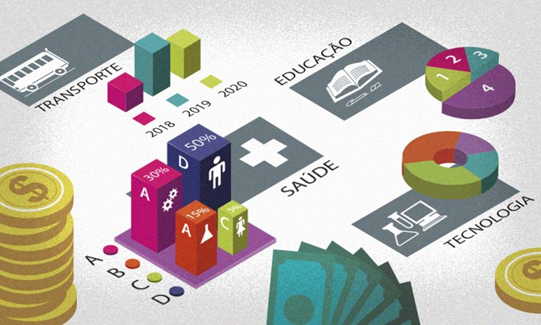

Podemos elencar como possíveis perguntas a serem respondidas:

1)	Quais políticos conseguiram aprovar mais emendas orçamentárias?

2)	Quais políticos aprovaram maiores valores?

3)	Para quais setores foram destinadas mais verbas?

4)	Quais estados receberam mais verbas?




Se for possível tentarei mapear se políticos de situação conseguem aprovar mais emendas orçamentárias que políticos de oposição.

#3.0 Detalhamento

##3.1 Busca pelos dados

Para responder as perguntas citadas acima busquei no Portal da Transparência do governo brasileiro informações detalhadas sobre emendas parlamentares referentes a orçamento.

No site existe a possibilidade de filtrar as informações, mas também existe um arquivo único com as informações disponíveis a partir de 2014.

https://portaldatransparencia.gov.br/download-de-dados/emendas-parlamentares

Optei por baixar o arquivo único



Referente a licença de uso dos dados:

(Trechos retirados do site)

**Dados Abertos**

“O Portal Mapa Brasil Transparente disponibiliza as informações das consultas em formato apropriado para download e processamento. O usuário poderá baixar as informações referentes às avaliações independentes e fazer todos os cruzamentos e análises desejados.

O novo Portal da Transparência reforça, assim, com novos recursos e mais informações, sua razão de ser uma ferramenta que permita ao cidadão, de forma cada vez mais eficiente, fiscalizar e assegurar a boa e correta aplicação dos recursos públicos federais.

O acesso ao Portal não requer usuário nem senhas, sendo permitido a qualquer cidadão navegar pelas páginas de forma livre, bem como visualizar e utilizar os dados disponíveis da forma que melhor lhe convier.”


##3.2 Coleta

Apos encontrar o dataset de Emendas Parlamentares no Portal da Trasnsparência e baixa-lo passei a analizar mais a fundo o seu conteudo.


###3.2.1 Analise Exploratória

Vou carregar o arquivo para melhor conhece-lo. A importação do dataset será através do pacote Pandas (Python Data Analysis Library), um arquivo .csv com cabeçalho disponibilizado no github.


In [1]:
# Importação biblioteca Pandas
import pandas as pd
import missingno as ms # para tratamento de missings
import matplotlib.pyplot as plt

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# O arquivo já contem o cabeçalho
# Carrega a variavel com o endereço do arquivo no github que contem o dataset
filename = "https://raw.githubusercontent.com/JGCMachado/Datasets/main/emendas.csv"
delimitador = ';'

# carga do dataset adicionando os nomes das colunas
emendas = pd.read_csv(filename, delimiter=delimitador)

In [4]:
# verifica o tipo do dataset heart_disease
print(type(emendas))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
emendas.head(5)

Código da Emenda  Ano da Emenda     Tipo de Emenda  \
0   Sem informação           2014  Emenda Individual   
1   Sem informação           2014  Emenda Individual   
2   Sem informação           2014  Emenda Individual   
3   Sem informação           2014  Emenda Individual   
4   Sem informação           2014  Emenda Individual   

  Código do Autor da Emenda Nome do Autor da Emenda Número da emenda  \
0                       S/I          Sem informação              S/I   
1                       S/I          Sem informação              S/I   
2                       S/I          Sem informação              S/I   
3                       S/I          Sem informação              S/I   
4                       S/I          Sem informação              S/I   

     Localidade do gasto Código Função       Nome Função Código Subfunção  \
0  SÃO JOÃO DO CARÚ - MA            10             Saúde              301   
1             BORBA - AM            10             Saúde              122   
2               Nacional            13           Cultura              392   
3          MARANHÃO (UF)            18  Gestão ambiental              544   
4        PERNAMBUCO (UF)            10             Saúde              302   

                          Nome Subfunção Valor Empenhado Valor Liquidado  \
0                         Atenção básica         1253150               0   
1                    Administração geral          999958               0   
2                       Difusão cultural      1665560,68          150860   
3                      Recursos hídricos          500000               0   
4  Assistência hospitalar e ambulatorial     23826320,09               0   

  Valor Pago Valor Restos A Pagar Inscritos Valor Restos A Pagar Cancelados  \
0          0                              0                               0   
1          0                              0                               0   
2          0                              0                       243083,14   
3          0                              0                          500000   
4          0                              0                      6463502,51   

  Valor Restos A Pagar Pagos  
0                    1253150  
1                     999958  
2                 1422477,54  
3                          0  
4                17362817,58

In [6]:
# Mostra as dimensões do dataset
print(emendas.shape)

(59138, 17)


In [8]:
# Verificando os valores nulos
print(emendas.isnull().sum())

Código da Emenda                   0
Ano da Emenda                      0
Tipo de Emenda                     0
Código do Autor da Emenda          0
Nome do Autor da Emenda            0
Número da emenda                   0
Localidade do gasto                0
Código Função                      0
Nome Função                        0
Código Subfunção                   0
Nome Subfunção                     0
Valor Empenhado                    0
Valor Liquidado                    0
Valor Pago                         0
Valor Restos A Pagar Inscritos     0
Valor Restos A Pagar Cancelados    0
Valor Restos A Pagar Pagos         0
dtype: int64


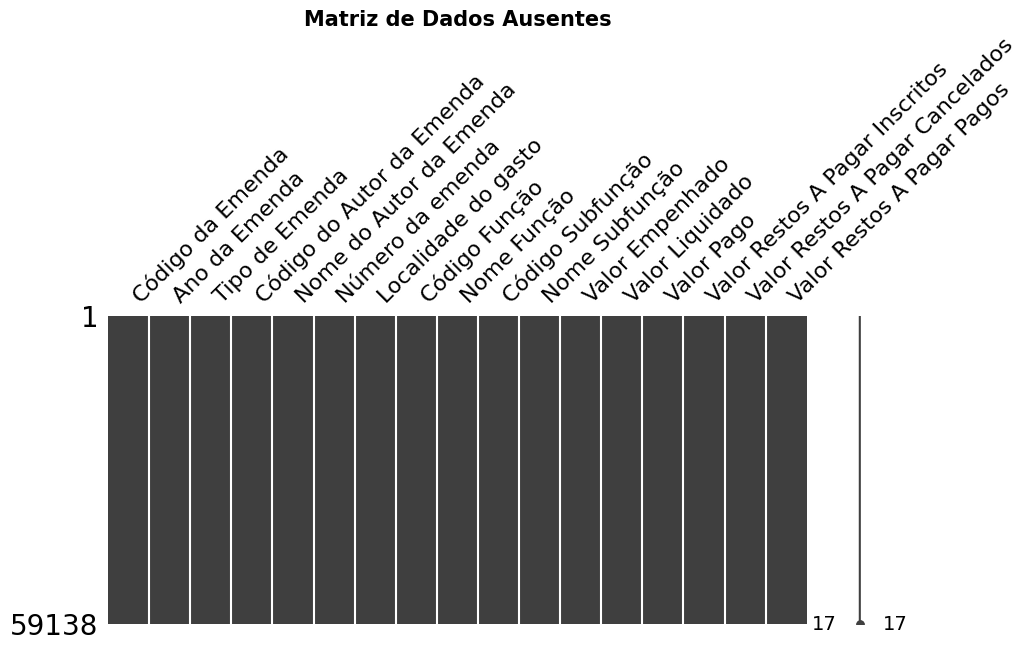

In [9]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(emendas, figsize=(10, 4))
plt.title("Matriz de Dados Ausentes", fontsize=15, fontweight="bold")
plt.show()

Podemos verificar que se trata de um dataset com 17 colunas, 59.138 linhas e que não contem valores nulos.


Estudando os dados importados percebi que o dicionário disponibilizado não esta 100% compatível com os dados do dataset. Os campos "Codigo IBGE Município", "Nome do Município", "Nome do Estado", "Codigo da Região" e "Nome da Região" que constam do dicionário de dados foram substituido pelo campo "Localidade do gasto" que é mencionado como "Regionalização"

No dataset também consta o campo não documentado "Tipo de Emenda". Campo categórico com o dominio: 'Emenda Individual', 'Emenda de Bancada', 'Emenda de Comissão' e 'Emenda de Relator'.

Para facilitar a realização das consultas que vão responder as questões levantadas no item 2.0 senti necessidade de criar dois campos. Um campo com a Abrangência da Emenda ("Municipal", "Estadual" ou "Nacional") e outro campo com a Sigla da UF referênte a Abrangência da Emenda sendo "BR" utilizado quando Abrangência Nacional.

As informações necessárias para as novas colunas puderam ser extraidas com base no campo "Localidade do gasto". Quando a Emenda é municipal este campo contem o nome do município seguido de um "-" e a sigla do estado do município, quando é estadual contem o nome do estado seguido da string "(UF)" e quando é uma Emenda de nivel nacional contem "nacional"

Vou criar uma lista contendo os nomes dos estados e suas siglas e 2 funções para criar as novas colunas

In [ ]:
# Dicionário de mapeamento de nomes de estados para siglas de UFs
mapeamento_estado_uf = {
    'ACRE': 'AC',
    'ALAGOAS': 'AL',
    'AMAPÁ': 'AP',
    'AMAZONAS': 'AM',
    'BAHIA': 'BA',
    'CEARÁ': 'CE',
    'DISTRITO FEDERAL': 'DF',
    'ESPÍRITO SANTO': 'ES',
    'GOIÁS': 'GO',
    'MARANHÃO': 'MA',
    'MATO GROSSO': 'MT',
    'MATO GROSSO DO SUL': 'MS',
    'MINAS GERAIS': 'MG',
    'PARÁ': 'PA',
    'PARAÍBA': 'PB',
    'PARANÁ': 'PR',
    'PERNAMBUCO': 'PE',
    'PIAUÍ': 'PI',
    'RIO DE JANEIRO': 'RJ',
    'RIO GRANDE DO NORTE': 'RN',
    'RIO GRANDE DO SUL': 'RS',
    'RONDÔNIA': 'RO',
    'RORAIMA': 'RR',
    'SANTA CATARINA': 'SC',
    'SÃO PAULO': 'SP',
    'SERGIPE': 'SE',
    'TOCANTINS': 'TO'
}

# Função para definir o tipo da abrangência do gasto da emenda com base na coluna Localidade do gasto
def definir_abrangencia_emenda(row):
    if '(UF)' in row['Localidade do gasto']:
        return 'Estadual'
    elif 'Nacional' in row['Localidade do gasto']:
        return 'Nacional'
    elif ' - ' in row['Localidade do gasto']:
        return 'Municipal'
    else:
        return 'NI'


# Função para definir o valor da coluna 'abrangencia_sigla' com base nas condições
def definir_abrangencia_sigla(localidade):
    if ' - ' in localidade:
        return localidade.split(' - ')[1]
    elif ' (UF)' in localidade:
        estado = localidade.split(' (UF)')[0]
        return mapeamento_estado_uf.get(estado, estado)  # Usar o mapeamento para obter a sigla da UF
    elif 'Nacional' in localidade:
        return 'BR'
    else:
        return 'NI'  # Caso padrão, pode ser ajustado conforme necessário


###3.2.2 Inclusão das colunas

Inclusão das colunas 'Abrangencia Emenda' e 'Abrangencia Sigla' baseadas no conteudo da coluna 'Localidade do gasto'

In [ ]:
# Aplicar a função para criar a coluna 'Abrangencia Emenda'
emendas['Abrangencia Emenda'] = emendas.apply(definir_abrangencia_emenda, axis=1)

In [ ]:
# Aplicar a função para criar a coluna 'Abrangencia Sigla'
emendas['Abrangencia Sigla'] = emendas['Localidade do gasto'].apply(definir_abrangencia_sigla)


In [ ]:
# exibe as primeiras linhas para confirmar a inclusão das colunas
emendas.head(5)

Código da Emenda  Ano da Emenda     Tipo de Emenda  \
0   Sem informação           2014  Emenda Individual   
1   Sem informação           2014  Emenda Individual   
2   Sem informação           2014  Emenda Individual   
3   Sem informação           2014  Emenda Individual   
4   Sem informação           2014  Emenda Individual   

  Código do Autor da Emenda Nome do Autor da Emenda Número da emenda  \
0                       S/I          Sem informação              S/I   
1                       S/I          Sem informação              S/I   
2                       S/I          Sem informação              S/I   
3                       S/I          Sem informação              S/I   
4                       S/I          Sem informação              S/I   

     Localidade do gasto Código Função       Nome Função Código Subfunção  \
0  SÃO JOÃO DO CARÚ - MA            10             Saúde              301   
1             BORBA - AM            10             Saúde              122   
2               Nacional            13           Cultura              392   
3          MARANHÃO (UF)            18  Gestão ambiental              544   
4        PERNAMBUCO (UF)            10             Saúde              302   

                          Nome Subfunção Valor Empenhado Valor Liquidado  \
0                         Atenção básica         1253150               0   
1                    Administração geral          999958               0   
2                       Difusão cultural      1665560,68          150860   
3                      Recursos hídricos          500000               0   
4  Assistência hospitalar e ambulatorial     23826320,09               0   

  Valor Pago Valor Restos A Pagar Inscritos Valor Restos A Pagar Cancelados  \
0          0                              0                               0   
1          0                              0                               0   
2          0                              0                       243083,14   
3          0                              0                          500000   
4          0                              0                      6463502,51   

  Valor Restos A Pagar Pagos Abrangencia Emenda Abrangencia Sigla  
0                    1253150          Municipal                MA  
1                     999958          Municipal                AM  
2                 1422477,54           Nacional                BR  
3                          0           Estadual                MA  
4                17362817,58           Estadual                PE

In [ ]:
# Mostra as informações do dataset
print(emendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59138 entries, 0 to 59137
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Código da Emenda                 59138 non-null  object
 1   Ano da Emenda                    59138 non-null  int64 
 2   Tipo de Emenda                   59138 non-null  object
 3   Código do Autor da Emenda        59138 non-null  object
 4   Nome do Autor da Emenda          59138 non-null  object
 5   Número da emenda                 59138 non-null  object
 6   Localidade do gasto              59138 non-null  object
 7   Código Função                    59138 non-null  object
 8   Nome Função                      59138 non-null  object
 9   Código Subfunção                 59138 non-null  object
 10  Nome Subfunção                   59138 non-null  object
 11  Valor Empenhado                  59138 non-null  object
 12  Valor Liquidado                 

###3.2.3 Salvando o Dataset
Nessa sessão o dataset é salvo com o nome "emendas_parlamentares" no disco efêmero do Colab. Na sequencia realizei um download do mesmo para subir em um Bucket S3 no ambiente da AWS


In [ ]:
# Salvar o DataFrame como um arquivo CSV com codificação UTF-8
emendas.to_csv('emendas_parlamentares.csv', sep=';', index=False, encoding='utf-8-sig')

##3.3 Modelagem

A modelagem de dados desempenha um papel importante no processo de ETL, ela garante que os dados sejam armazenados de maneira eficiente para suportar a geração de análises e relatórios.

Para este trabalho foi desenvolvido um modelo com uma tabela flat desnormalizada conforme ilustração abaixo






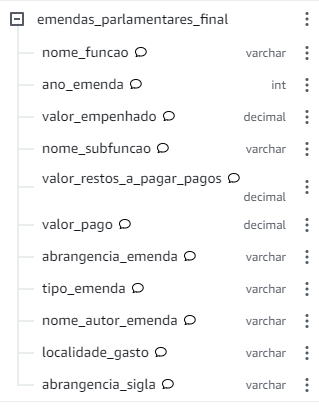

###3.3.1 Catalogo de dados

Um catálogo de dados e uma documentação adequada são pilares essenciais da governança de dados. O catálogo de dados oferece uma visão organizada e acessível dos dados da organização, promovendo a transparência e facilitando o acesso.

Além disso, ele apoia a integração de dados de diferentes fontes, minimiza redundâncias e melhora a qualidade geral dos dados, contribuindo para a tomada de decisões. A documentação, por sua vez, garante que os processos, políticas e procedimentos relacionados aos dados sejam claramente definidos e compreendidos, facilitando a manutenção, a rastreabilidade e a colaboração entre as equipes.

Juntos, um catálogo de dados bem mantido e uma documentação sólida formam a base de uma governança eficaz, promovendo a confiabilidade, a segurança e a maximização do valor dos ativos de dados de uma organização.

Para este trabalho a documentação da tabela e de seus atributos foi realizada no **Glue Data Catalog** no ambiente da AWS conforme os prints abaixo:


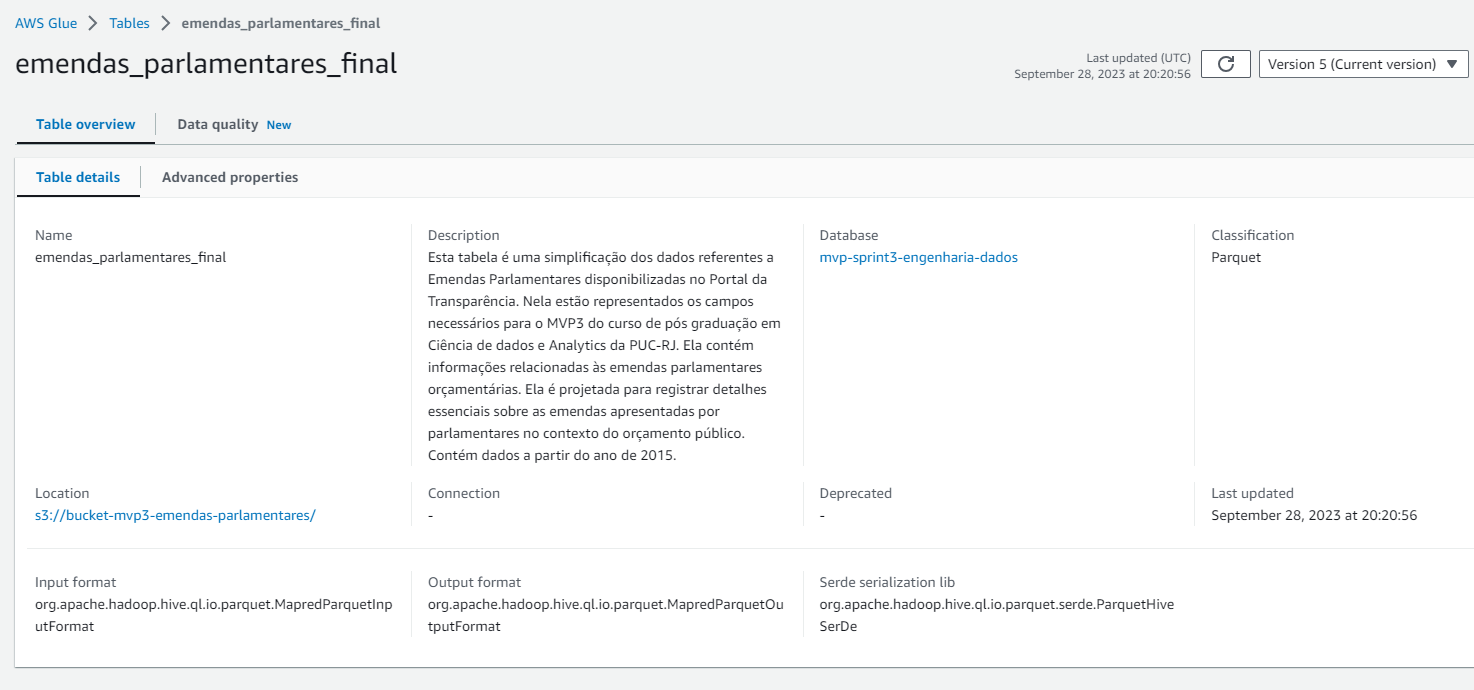

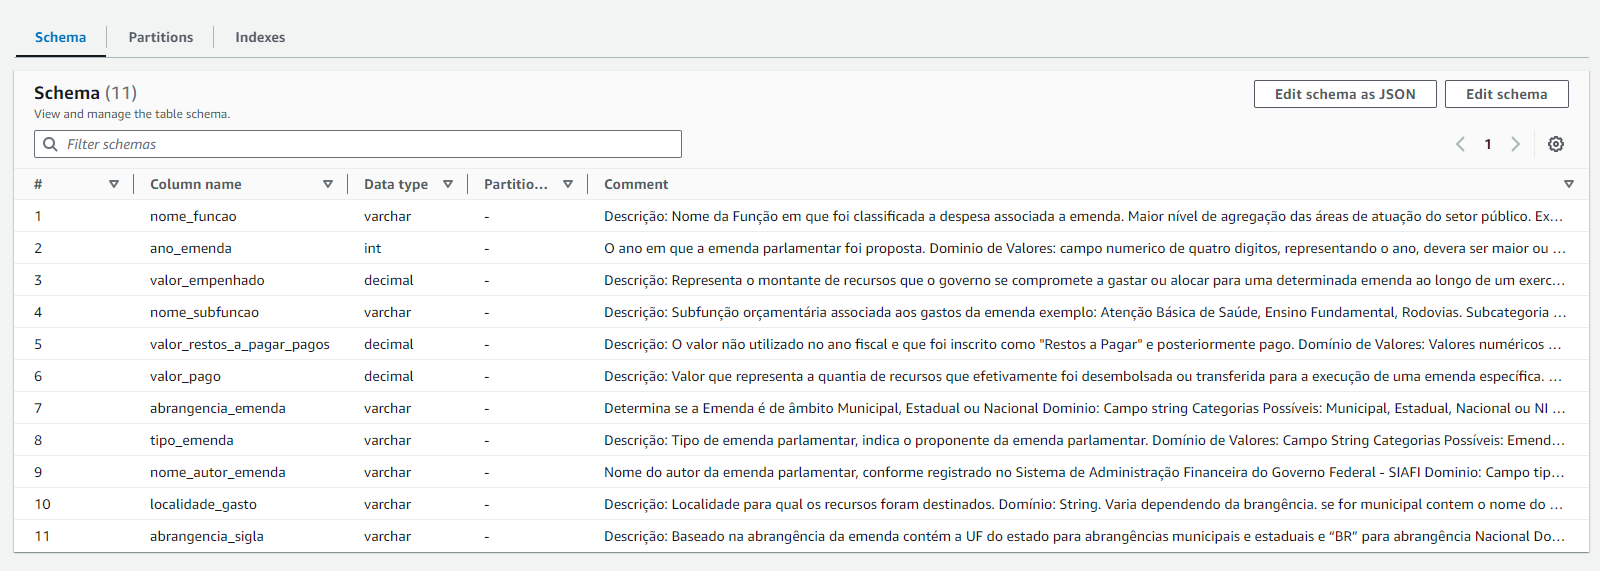

O Data catalog permite salvar o schema em formato Json, desta forma anexei o link para facilitar a visualização da documentação dos atributos

https://github.com/JGCMachado/Scripts/blob/main/Descricao_Campos.json


Abaixo podemos ver a integração da documentação entre diferentes serviços. O Data Catalog permite que o Athena tenha acesso as descrições das colunas.

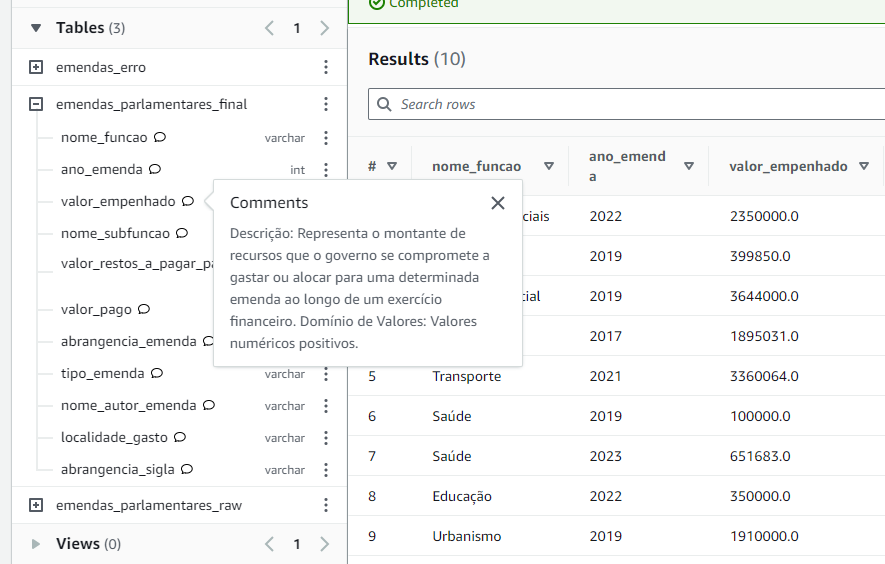

###3.3.1 Arquitetura da Solução e Linhagem dos Dados

####3.3.1.1 Arquitetura Proposta da Solução

O ambiente cloud escolhido para o trabalho foi o da Amazon Web Services (AWS), a seguir uma breve descrição da arquitetura adotada.


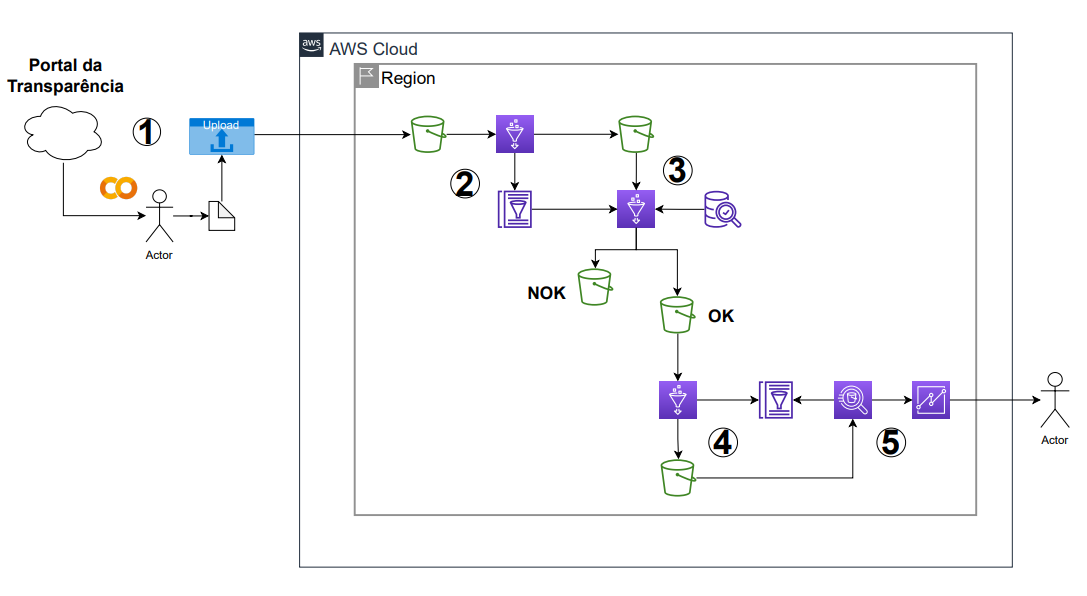

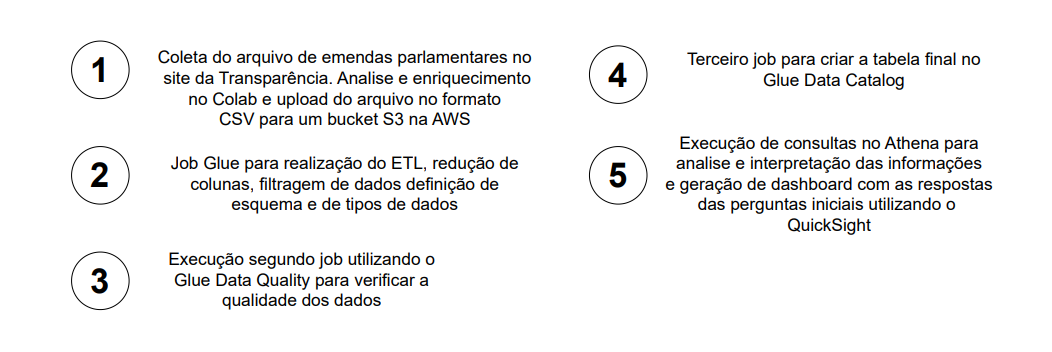

####3.3.1.2 Linhagem dos dados

Conforme já mencionado anteriormente os dados foram baixados do site do Portal da Transparência do governo brasileiro em formato CSV.

Realizada uma analise inicial via Colab para entendimento do dataset foi verificado a necessidade de enriquecer as informações com duas novas colunas referentes a abrangência da emenda parlamentar. Um campo com a Abrangência da Emenda ("Municipal", "Estadual" ou "Nacional") e outro campo com a Sigla da UF referênte a Abrangência da Emenda sendo "BR" utilizado quando abrangência for nacional. Esses dois campos foram preenchidos com o conteudo do campo "Localidade do gasto" que contem tres tipos de informações diferentes.

Estando o dataset montado ele foi disponibilizado via upload em um bucket S3 para iniciar o processo de ETL.

Já em ambiente cloud o primeiro processo executado foi um Job Glue de ETL onde foram descartadas algumas colunas que não seriam utilizadas e a filtragem dos registros eliminando os anteriores a 2015. Os dados no arquivo são disponibilizados a partir de 2014 porem os referentes a 2014 estão com a qualidade muito baixa e não foram incluidos no estudo. Ao final uma tabela intermediária (emendas_parlamentares_raw) é criada no Data Catalog e as informações armazenadas em um bucket S3 em formato parquet.

No próximo Job são executadas algumas regras para verificar a qualidade das informações que são separadas em dois buckets. Um com os registros Ok e outro com os registros que foram reprovadas em alguma regra. Como na fase anterior as informações continuam armazenadas em formato parquet.

Por fim, como o processo de verificação de qualidade não consegue entregar o resultado no catalogo, o terceiro job apenas cria a tabela emendas_parlamentares_final no Data Catalog com o layout descrito no item 3.3 (Modelagem) e disponibiliza os dados em formato parquet para serem consumidos por qualquer ferramenta de analise de dados compativel com esse padrão.

##3.4 Carga

Passemos agora para a documentação dos processos de carga e ETL executados no ambiente AWS.

O processo consiste em tres Jobs desenvolvidos utilizando o AWS Glue Studio, uma ferramenta visual que simplifica o desenvolvimento de fluxos de dados ETL.

Como repositório dos metadados utilizei o AWS Glue Data Catalog é um serviço de metadados totalmente gerenciado que simplifica e acelera a descoberta, o acesso e a governança de dados em ambientes de nuvem.

Para verificação da qualidade dos dados utilizei o Glue Data Quality ferramenta que permite o desenvolvimento de regras de qualidade utilizando a linguagem dqld. Aproveitei esse trabalho para conhecer um pouco desse serviço que está em preview.

Por fim para verificar o resultado dos processos e das transformsções utilizei o AWS Athena, ferramenta serverless que permite em conjunto com o Data Catalog, consultas e analise em grandes volumes de dados armazenados no Amazon S3 usando a linguagem padrão do SQL. Com o Athena é possível executar consultas ad-hoc em dados semi-estruturados ou estruturados sem a necessidade de provisionar ou gerenciar infraestrutura.

###3.4.1 O ETL

O primeiro Job executado é responsável pelas transformações e filtragem dos dados. Logo no primeiro nó é realizada a ingestão do arquivo original no formato CSV que foi disponibilizado em um bucket.


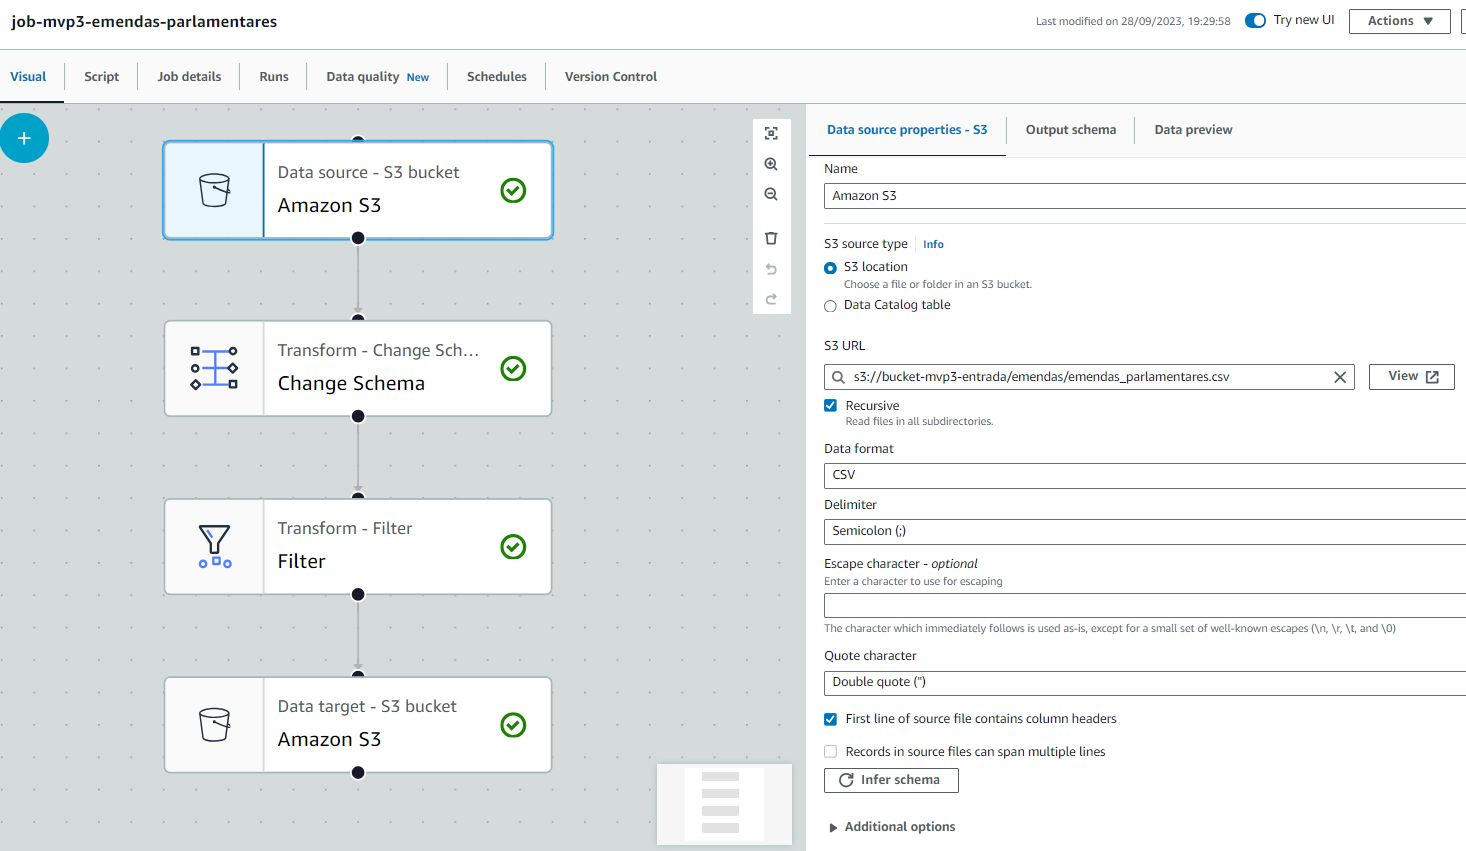

No segundo nó do processo ocorre a transformação do esquema, descartando os campos não necessário e equalizando os data types. Podemos observar logo abaixo uma pequena amostra dos dados resultantes.

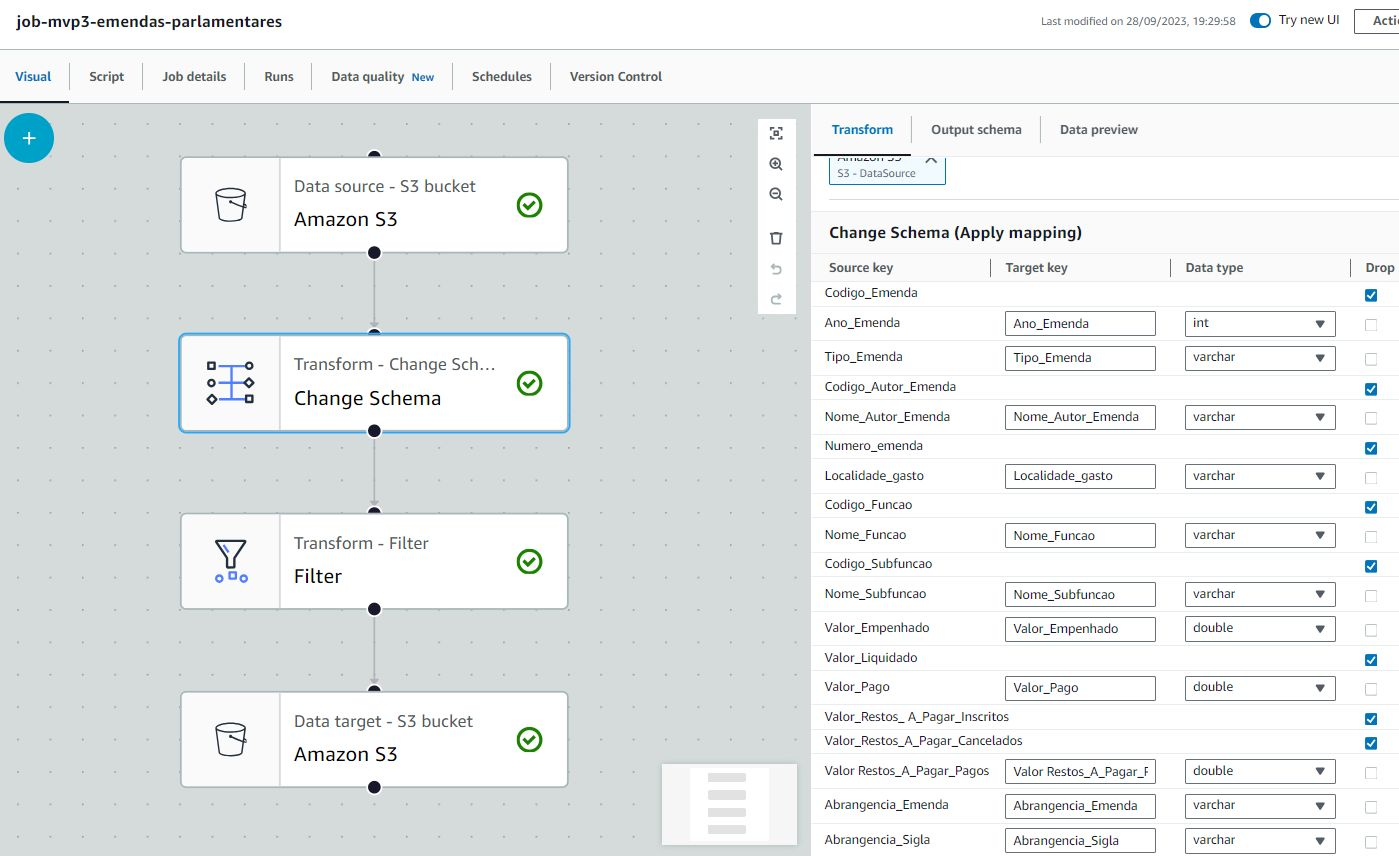

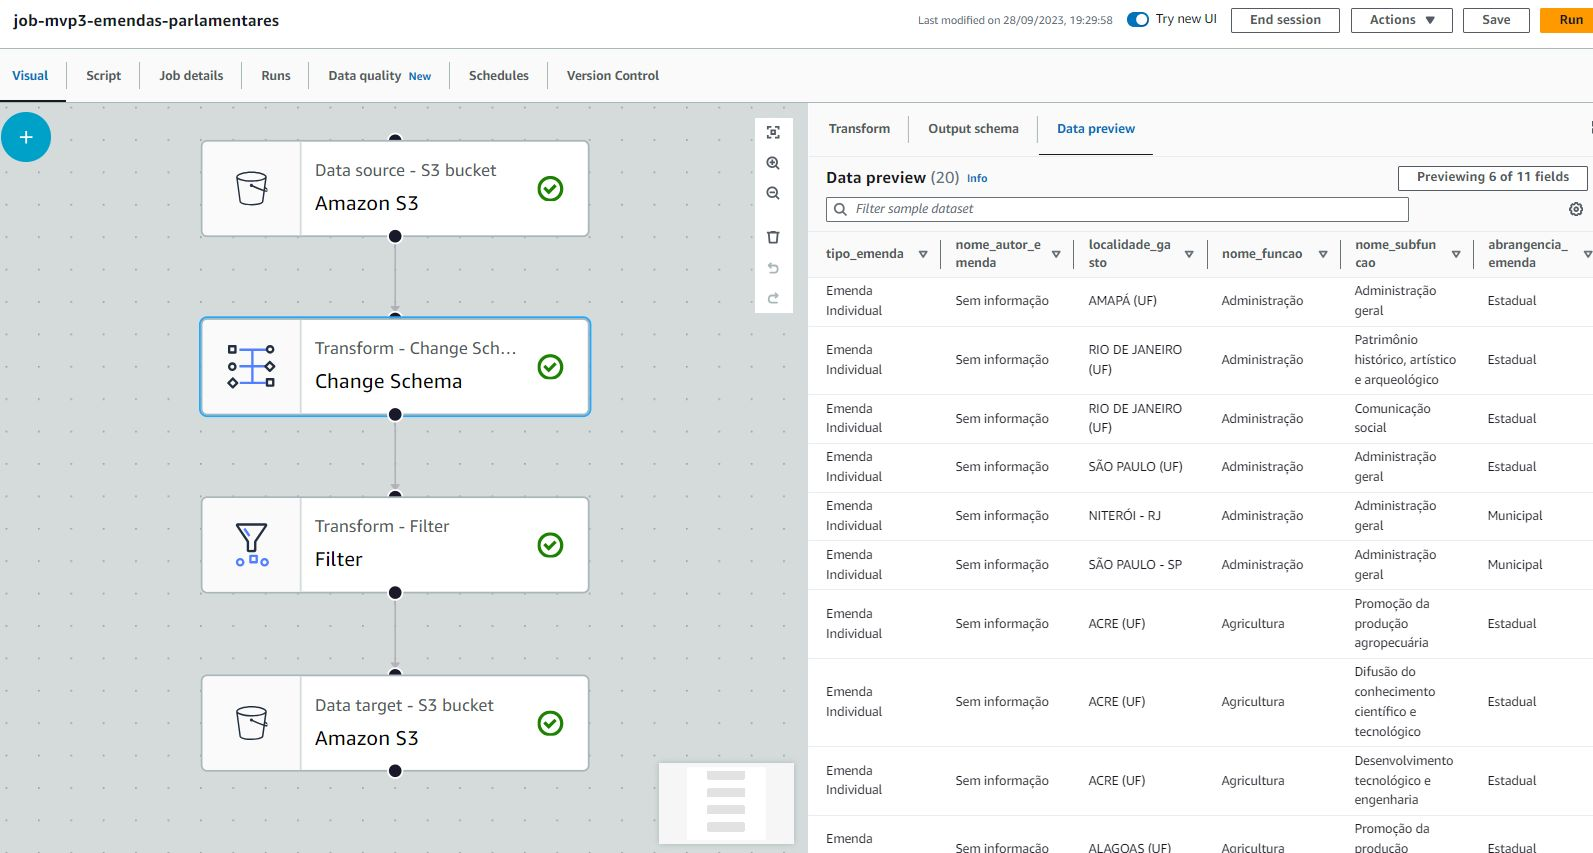

No terceiro nó é realizada a seleção dos registros posteriores ao ano de 2014. Conforme mencionado anteriormente, a qualidade dos dados referentes ao ano de 2014 estava muito precária com muita informação faltante.
Podemos observar também nesse nó o formato já definitivo do esquema dos dados resultante desse primeiro job.

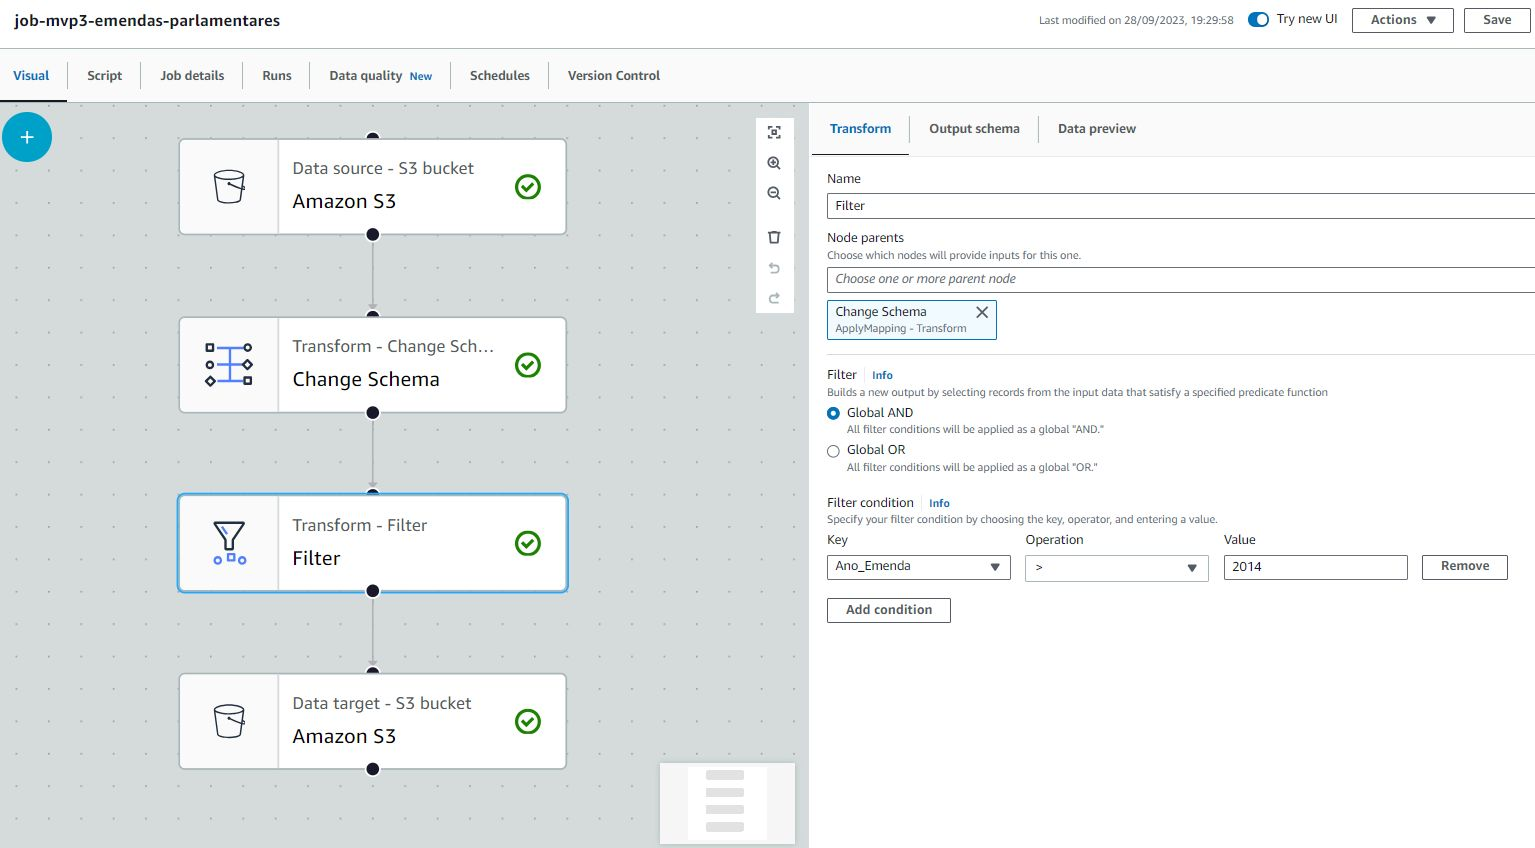

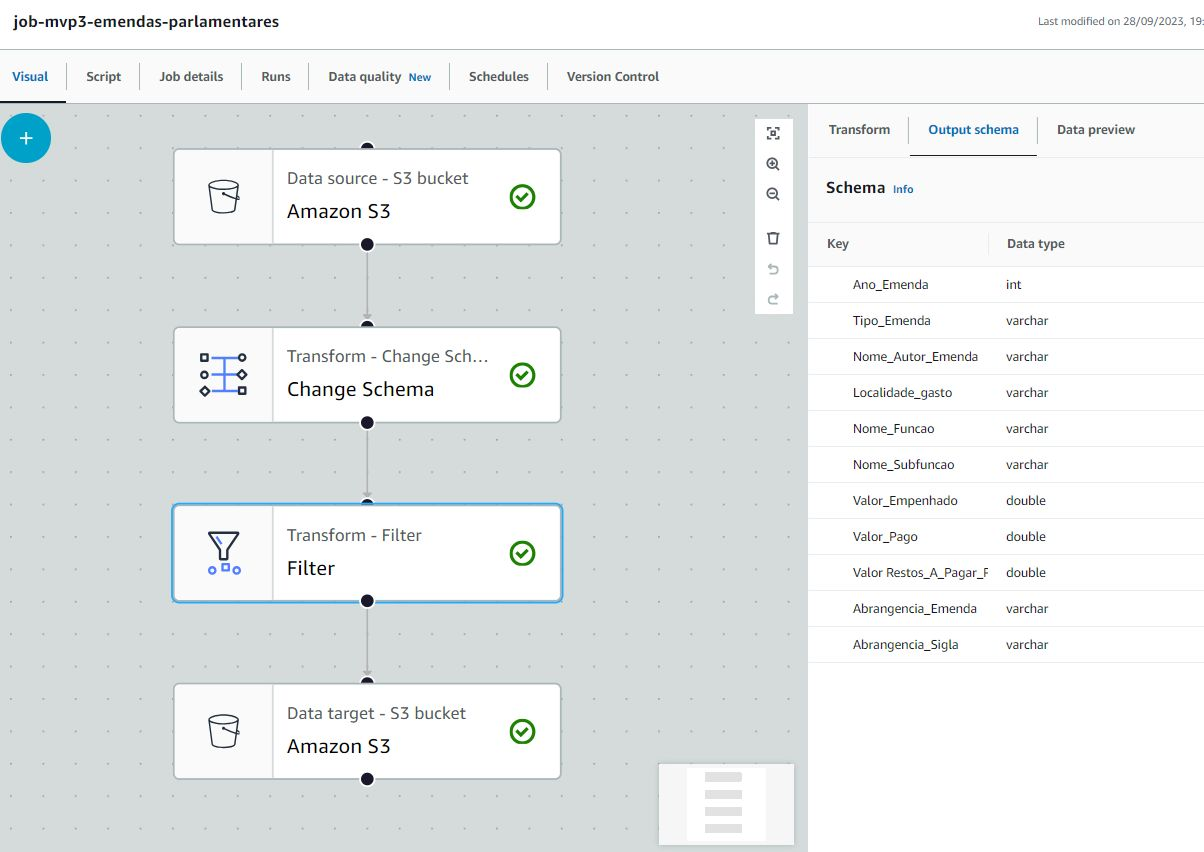

Por fim no ultimo nó deste job vemos a configuração final para salvar o resultado em um bucket chamado "emendas-tratadas" e catalogar os metadados na tabela intermediária do processo chamada "emendas_parlamentares_raw" em formato colunar parquet usado comumente em processamento de big data e análise de dados.

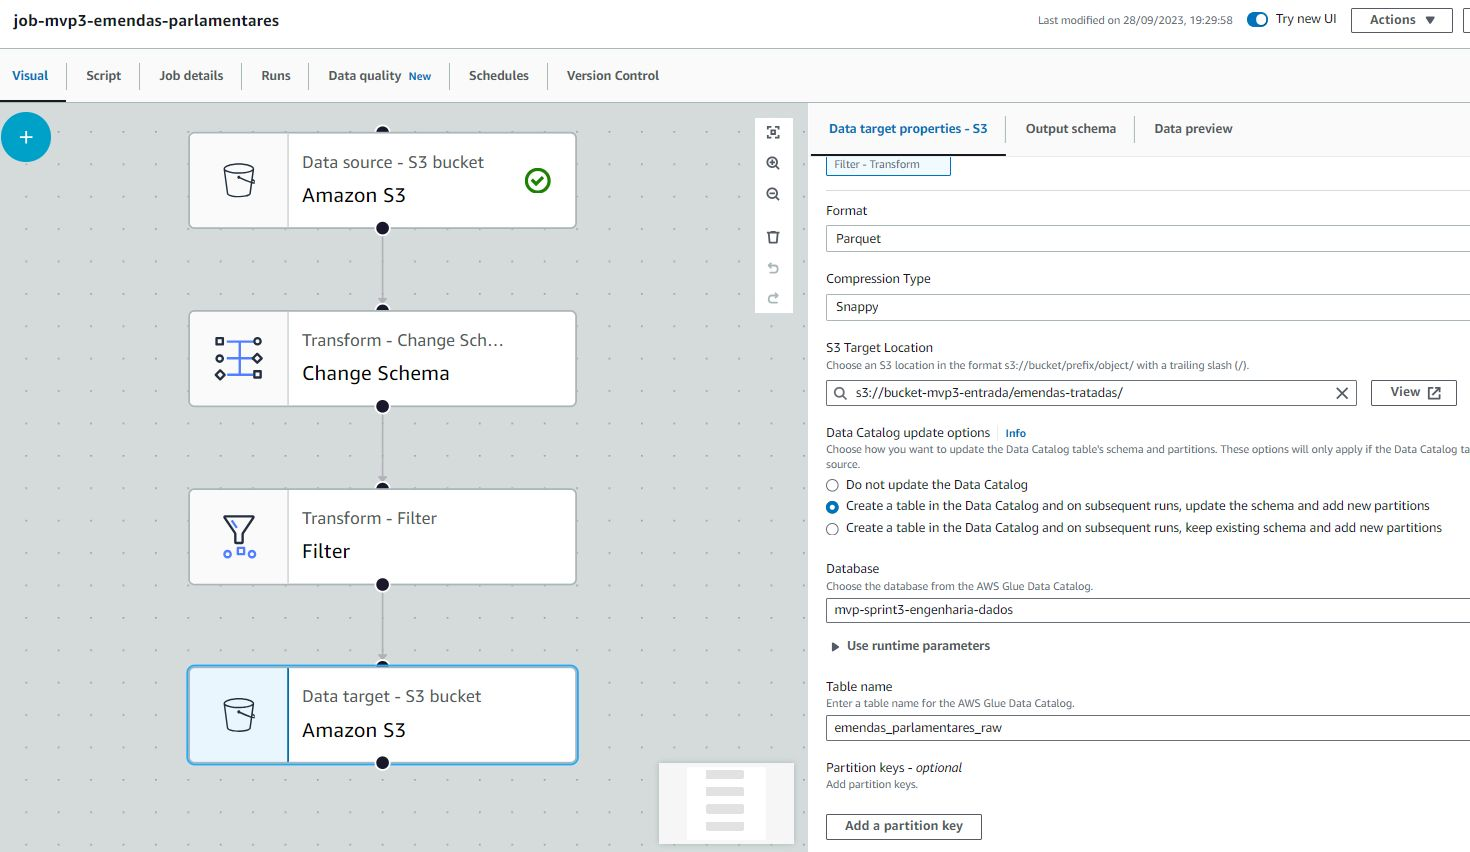

Abaixo a evidência de execução do Job

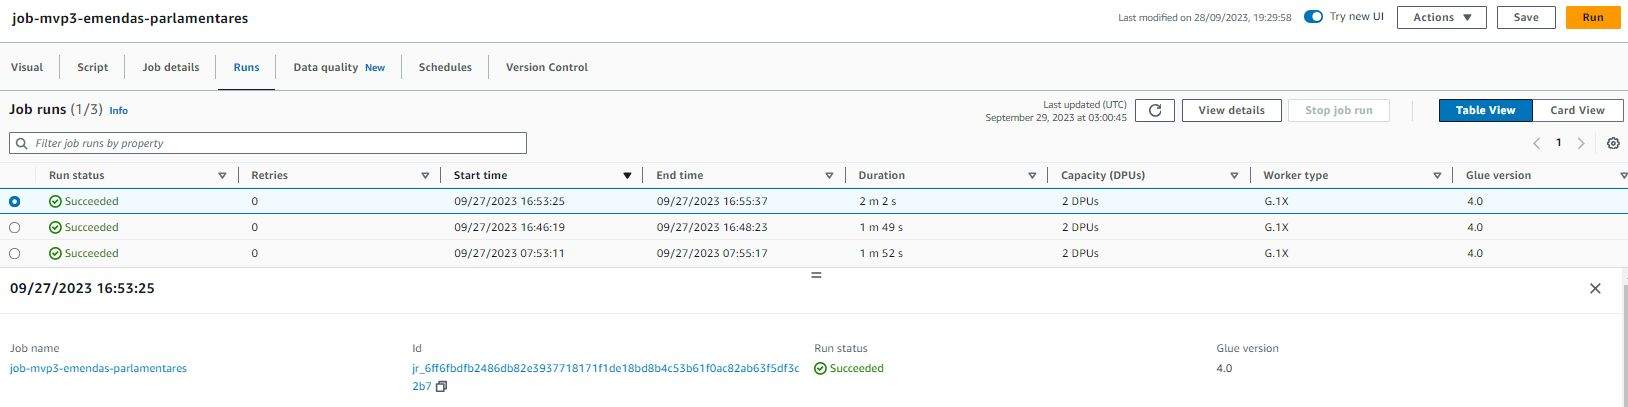

###3.4.2 Validando a Qualidade dos dados

**Descrevendo o Processo**


No segundo nó eu utilizo o Glue Data Quality para verificar a qualidade das informações. O Data Quality é um serviço novo (até esta data estava em preview disponível apenas em algumas regiões) que permite avaliar e monitorar a qualidade dos dados atravéz de regras definidas na linquagem Data Quality Definition Language (DQDL).



Este job consiste no processo de validação dos dados baseado nas regras criadas. Podemos observar na ilustração abaixo que o nó "Evaluate Data Quality" recebe informações de quatro outros nós. O primeiro é ingestão da nossa tabela intermediária resultante do processo anterior. É ela que contem os dados para validação. A ingestão é feita atravéz do Data Catalog. Os outros tres nós são dominios contra os quais alguns dados serão validados.

Abaixo do nó "Evaluate Data Quality" vemos dois caminhos. Pela direita são armazenadas informações sobre a execução das regras. Pela esquerda temos um nó com validação condicional que separa os registros que passaram na validação dos que foram reprovados. Ambos são armazenados em buckets distintos e em formato parquet.

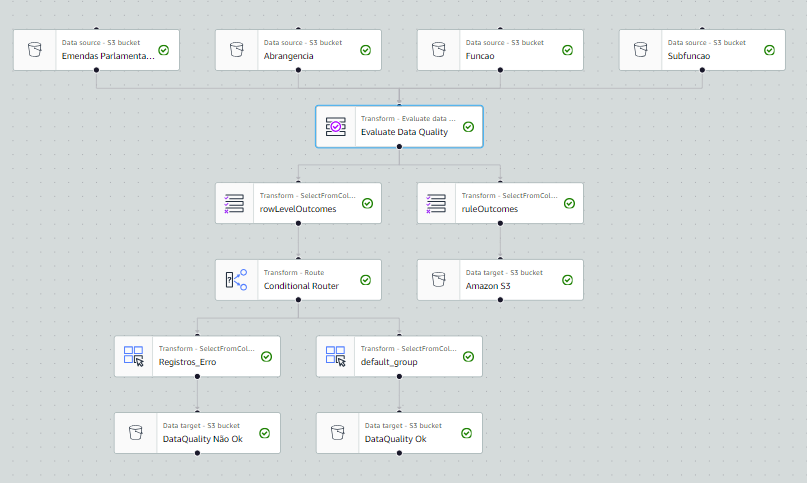

**Indo mais a fundo nas configurações**

No primeiro nó a ingestão da tabela "emendas_parlamentares_raw" atravéz do Data Catalog, seguido de uma amostra dos registros carregados e logo abaixo a ingestão de um arquivo CSV contendo o domínio para as Funções (código e descrição) e também uma amostra dos registros. A configuração para os nós Abrangência e Subfunção é análoga.

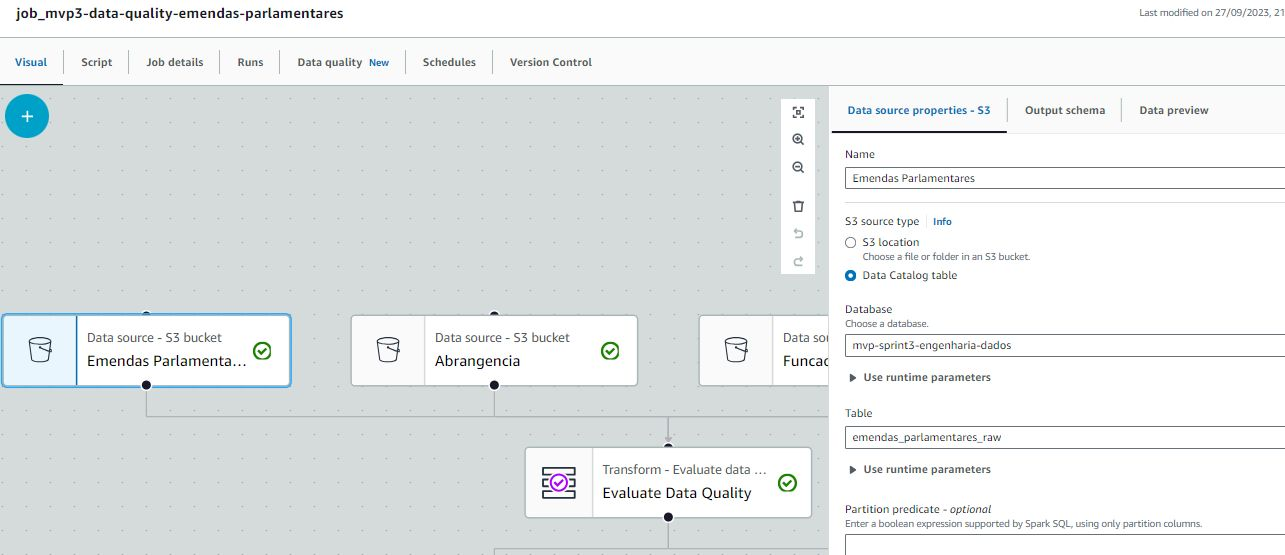

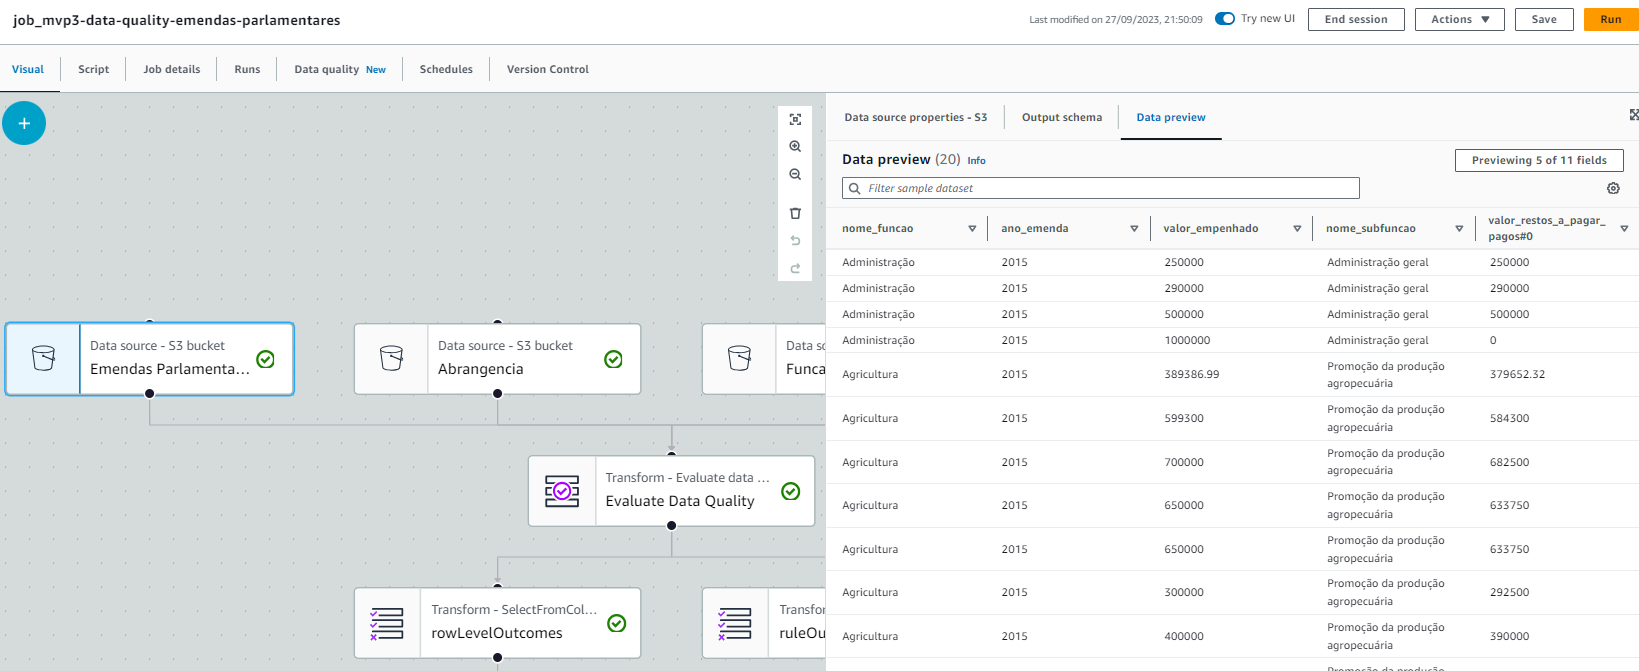

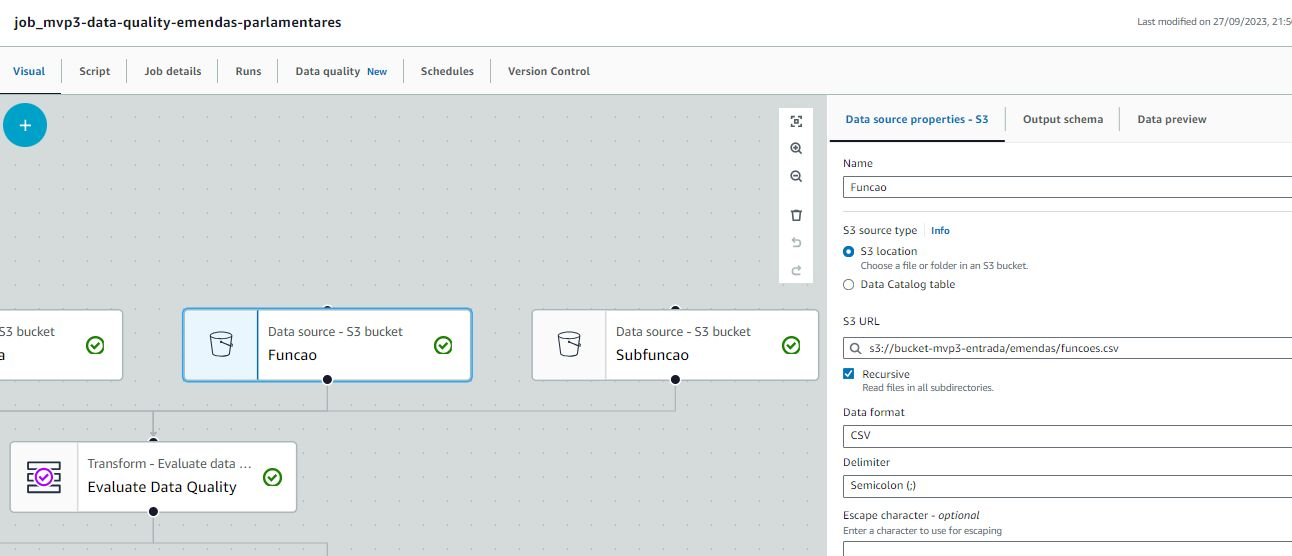

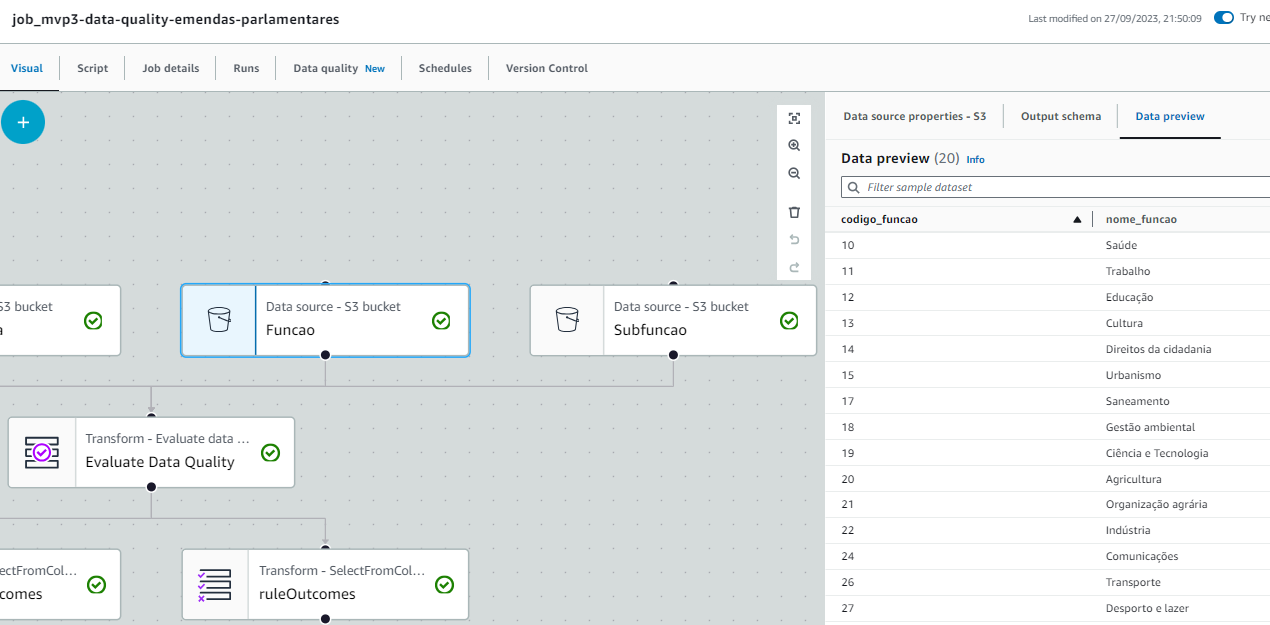

O nó "Evaluate Data Quality" é o coração desse job. Nele estão definidos os nós de entrada, as regras a serem aplicadas e que ação tomar caso elas não sejam satisfeitas.

Cada uma das regras possi exemplos de como configurar. Existe um "Helper" onde podemos encontrar todas as regras e também verificar os esquemas de todas as entradas do módulo.

Na parte inferior da configuração do nó é definido se desejamos incluir na saida do processamento campos com os resultados das regras (será mostrado mais a frente) e o que fazer caso não satisfaça alguma regra, continua o processamento ou para?



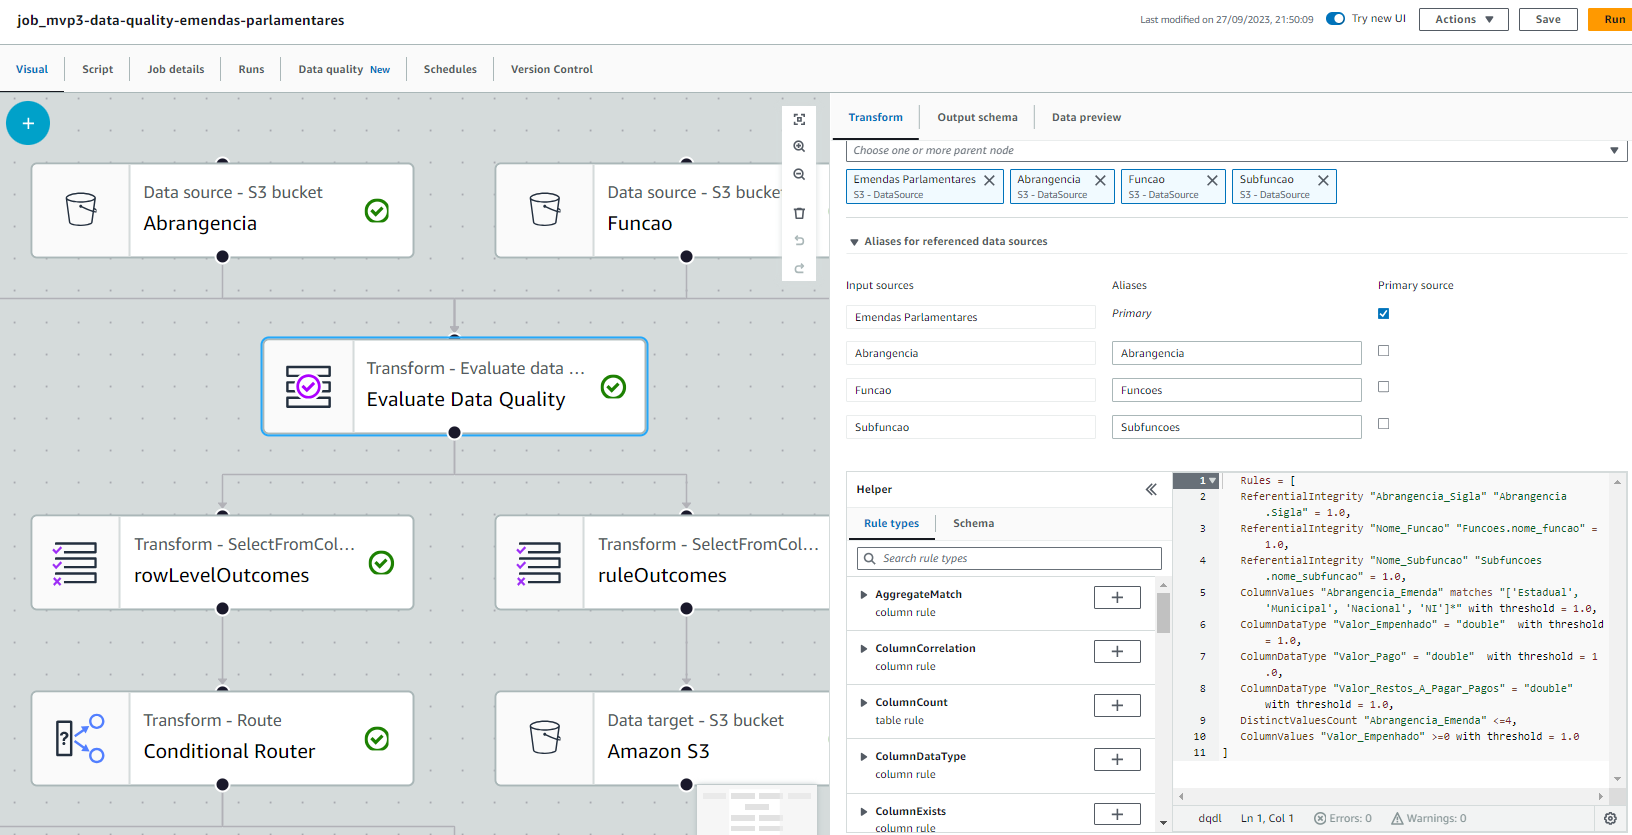

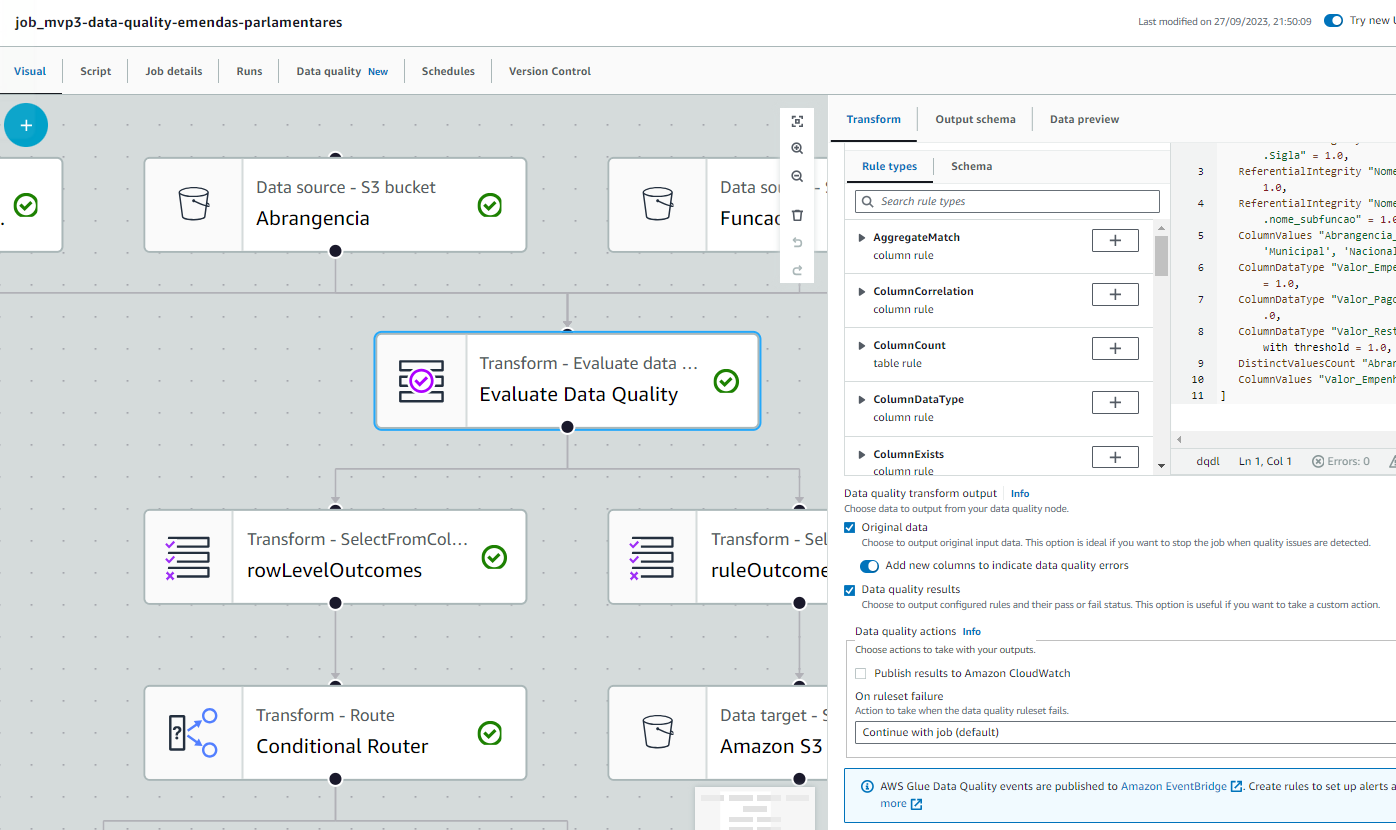

Foram criadas regras verificando a integridade referencial nas tabelas de domínio "Abrangência", "Funcoes" e "Subfuncoes", verificando o tipo do dado numerico para os campos "valor", se o "Valor_Empenhado" não possui valores negativos e se o campo "Abrangencia_Emenda" possui apenas quatro valores distintos (em duas regras diferentes e de duas formas diferentes)

Para cada regra é possível definir um valor (threshold) para determinar qual percentual de registros reprovados pela regra é aceito para continuar o processamento. No exemplo executado nesse trabalho todos os percentuais foram definidos em 100%

Abaixo estão as regras criadas:

Rules = [
   ReferentialIntegrity "Abrangencia_Sigla" "Abrangencia.Sigla" = 1.0,

   ReferentialIntegrity "Nome_Funcao" "Funcoes.nome_funcao" = 1.0,

   ReferentialIntegrity "Nome_Subfuncao" "Subfuncoes.nome_subfuncao" = 1.0,

   ColumnValues "Abrangencia_Emenda" matches "['Estadual', 'Municipal',
   'Nacional', 'NI']*" with threshold = 1.0,

   ColumnDataType "Valor_Empenhado" = "double"  with threshold = 1.0,

   ColumnDataType "Valor_Pago" = "double"  with threshold = 1.0,

   ColumnDataType "Valor_Restos_A_Pagar_Pagos" = "double"  with threshold = 1.0,

   DistinctValuesCount "Abrangencia_Emenda" <=4,

   ColumnValues "Valor_Empenhado" >=0 with threshold = 1.0
   
]

Segue abaixo a evidência da execução das regras de qualidade e a evidência da execução do job


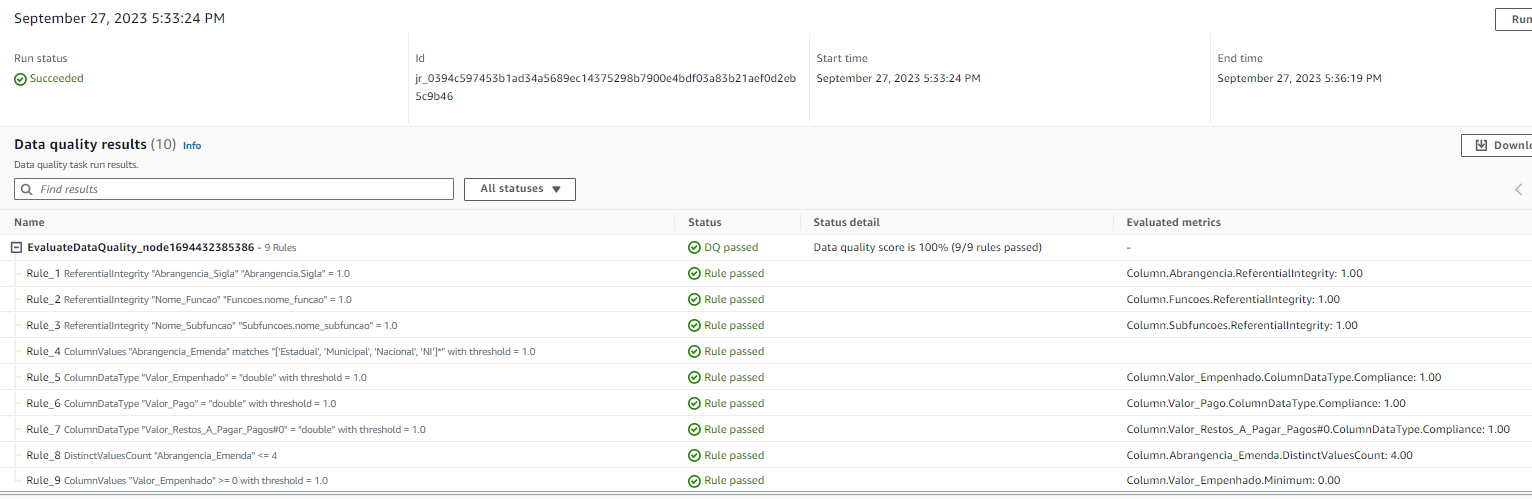

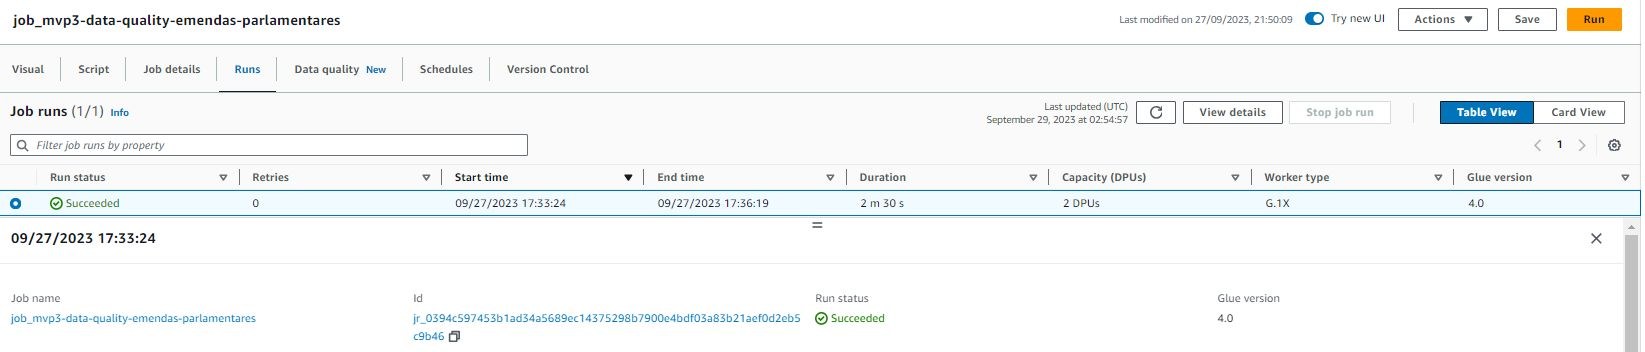

Com relação as regras gostaria de deixar duas resalvas:

Primeiro, Não conheço os detalhes do sistema do Portal da Transparência e não sei se é possível cadastrar uma emenda sem valores, mas como existe registro de valores pagos a emenda em exercicios fiscais posteriores e como são menos de 15 registros num total de 57.250, optei por não remover esses registros. Seria algum tipo de Emenda Emergencial?


Segundo, na regra "ColumnDataType" não é possível validar campos alfanumericos (char, varchar, string...). Tentei de algumas formas validar utilizando a regra "CustomSQL" mas ela é limitada e não funcionou com as funções que eu testei. O texto abaixo está em ingles porque como está em preview essa regra ainda não está documentada na versão em portugês.



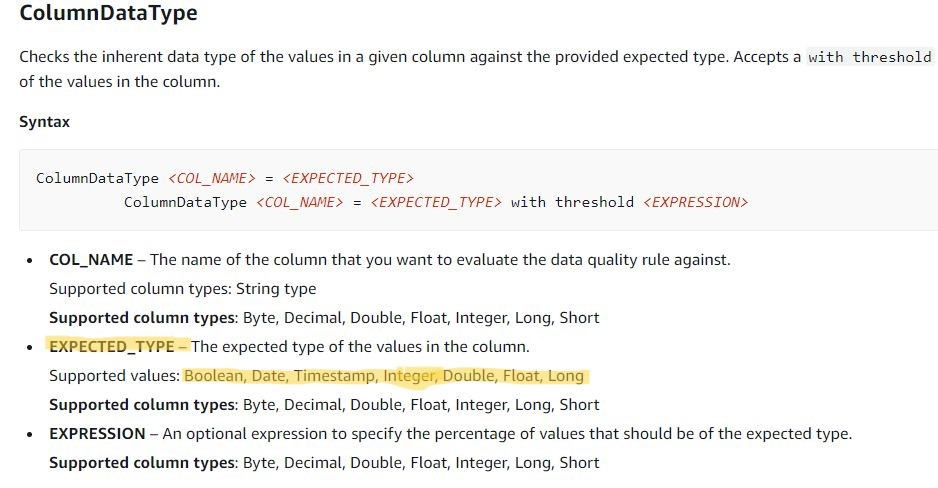

###3.4.3 Carregando o Data Catalog

O terceiro e ultimo job executado durante a carga tem por finalidade catalogar os registros que foram aprovados nas validações do processo de qualidade.

Seguindo o padrão, no primeiro nó é feita a ingestão dos dados aprovados no job anterior. Vale aqui registrar que como o processo de validação de qualidade não tem interação com o Data Catalog os dados são novamente disponibilizados em um bucket em formato parquet.

O segundo nó tem por finalidade realizar uma outra transformação retirando os campos referentes ao resultado das regras de qualidade que foram adicionados no processo anterior. Esses campos são necessários para verificar por qual regra um registro foi reprovado e faz sentido no conjunto de dados reprovados. Como nesse bucket estão apenas os aprovados podemos elimina-los.

Por fim no terceiro nó é criada no Data Catalog a tabela "emendas_parlamentares_final" que poderá ser disponibilizada para quem necessitar dessas informações.

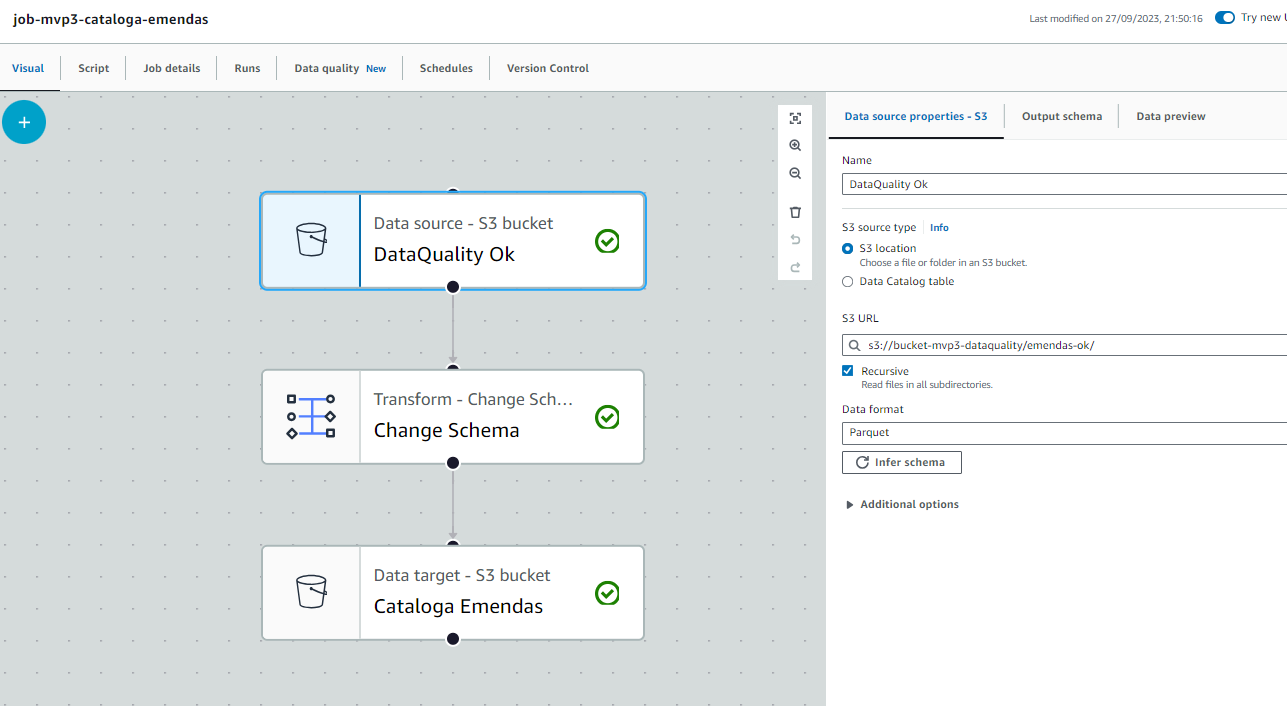

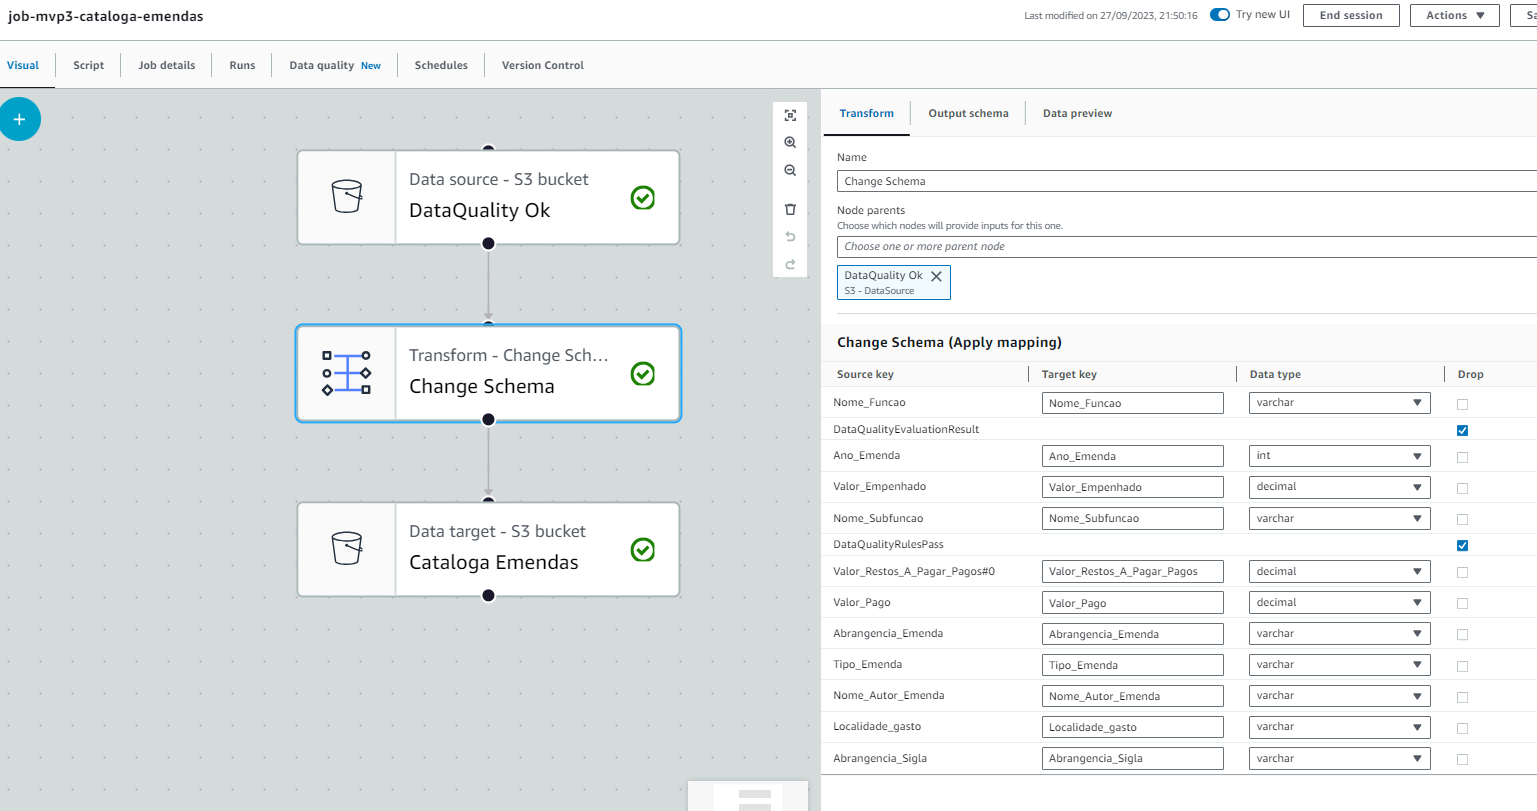

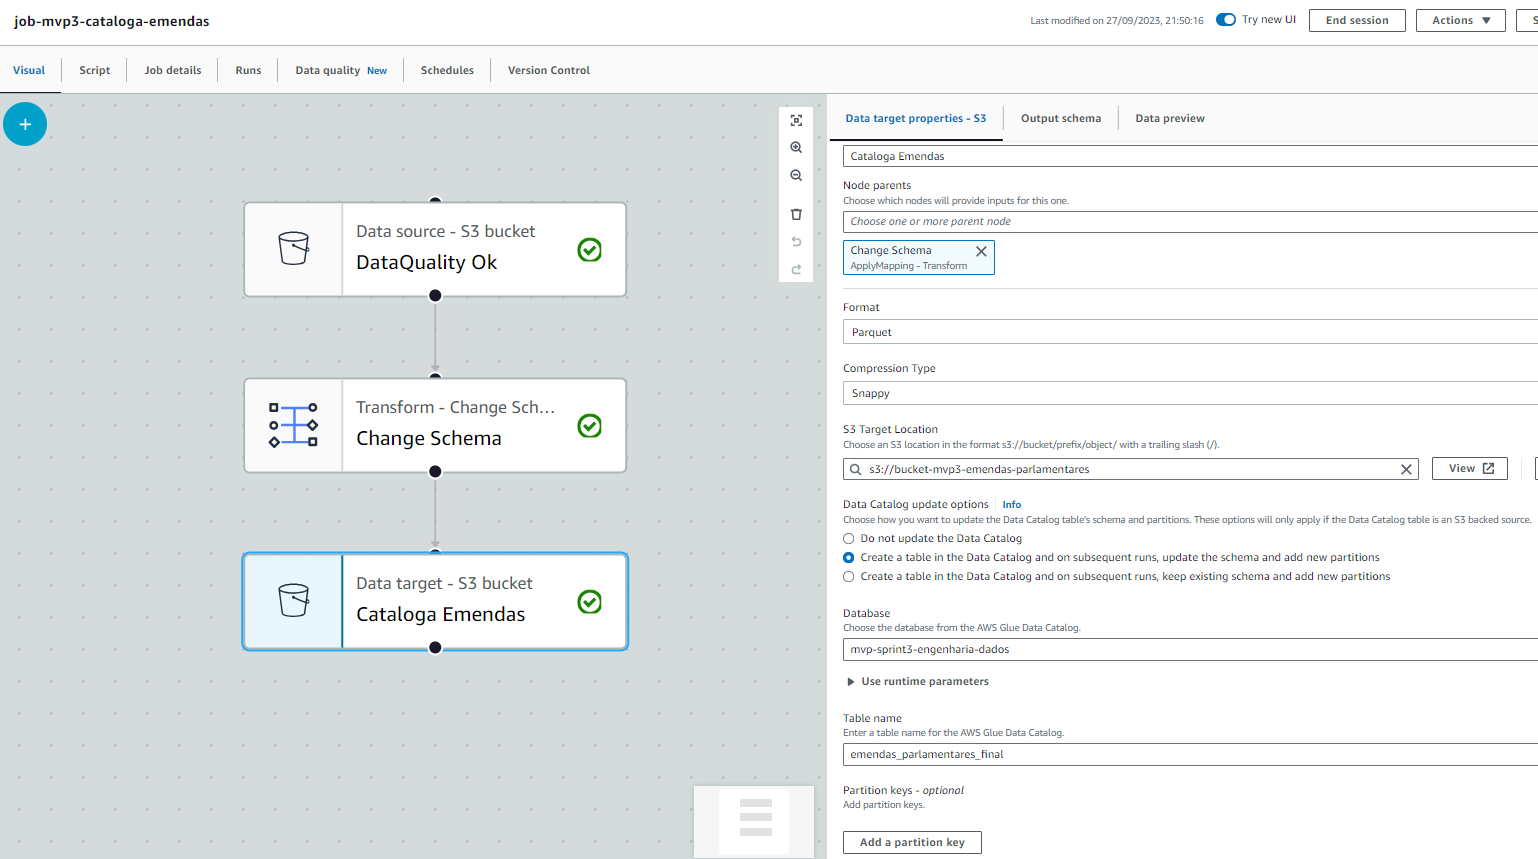

Abaixo a evidência da execução do job e um select na tabela utilizando o Athena para mostrar os registros importados.

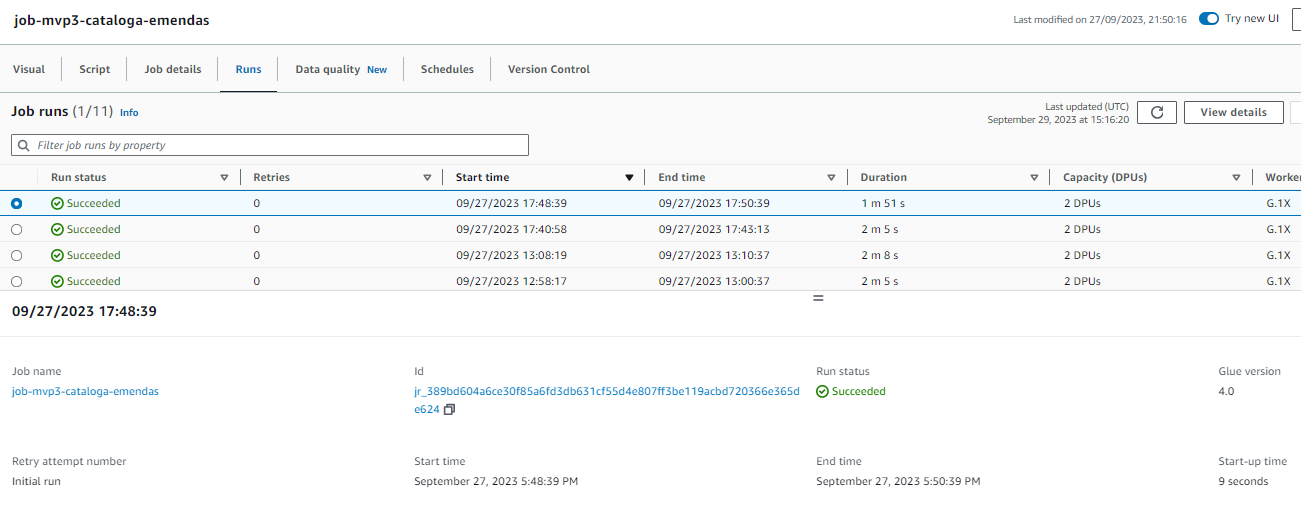

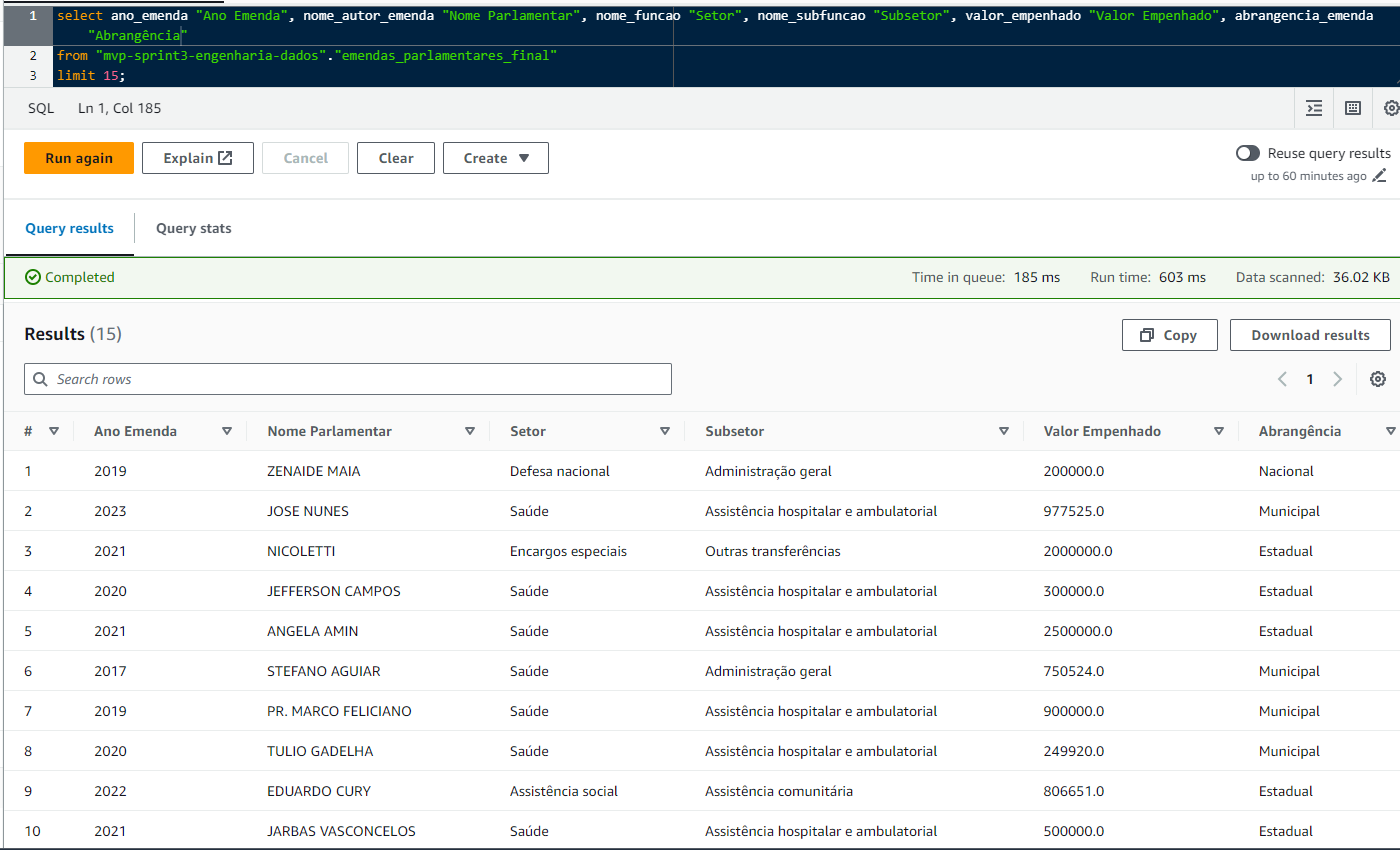

###3.4.4 Complemento sobre o Data Quality

Como todas as regras passaram 100% aqui no trabalho resolvi criar uma situação onde a regra fosse rejeitada para demosntrar o comportamento do serviço.

Retirei o valor "Nacional" da segunda regra que valida o dominio do campo "Abrangencia_Emenda". Os registros aprovados seguiram para o bucket "DataQuality OK" enquanto os reprovados foram para o bucket "DataQuality Não OK".

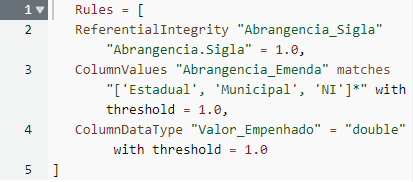

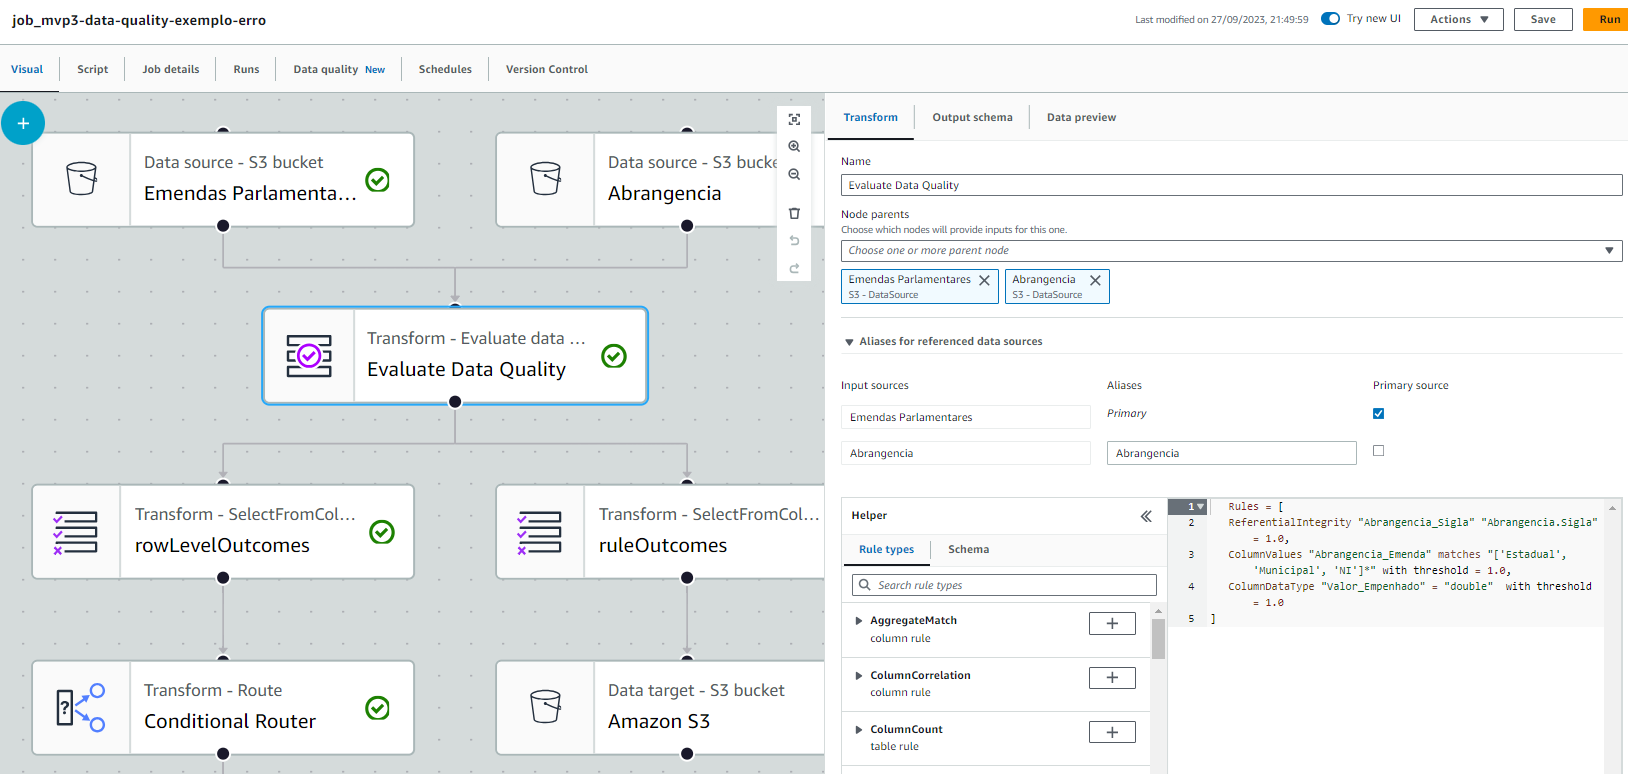

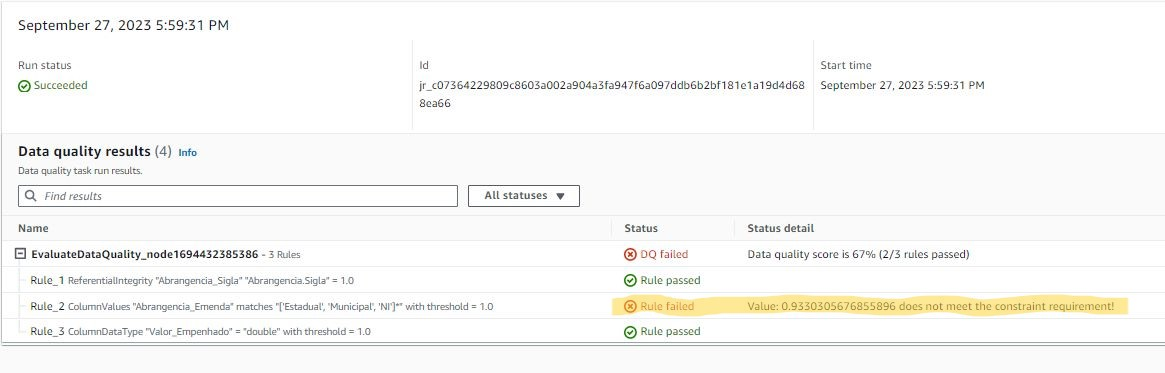

Reparem que os campos acrescentados são cruciais para entender o porque da rejeição do registro.

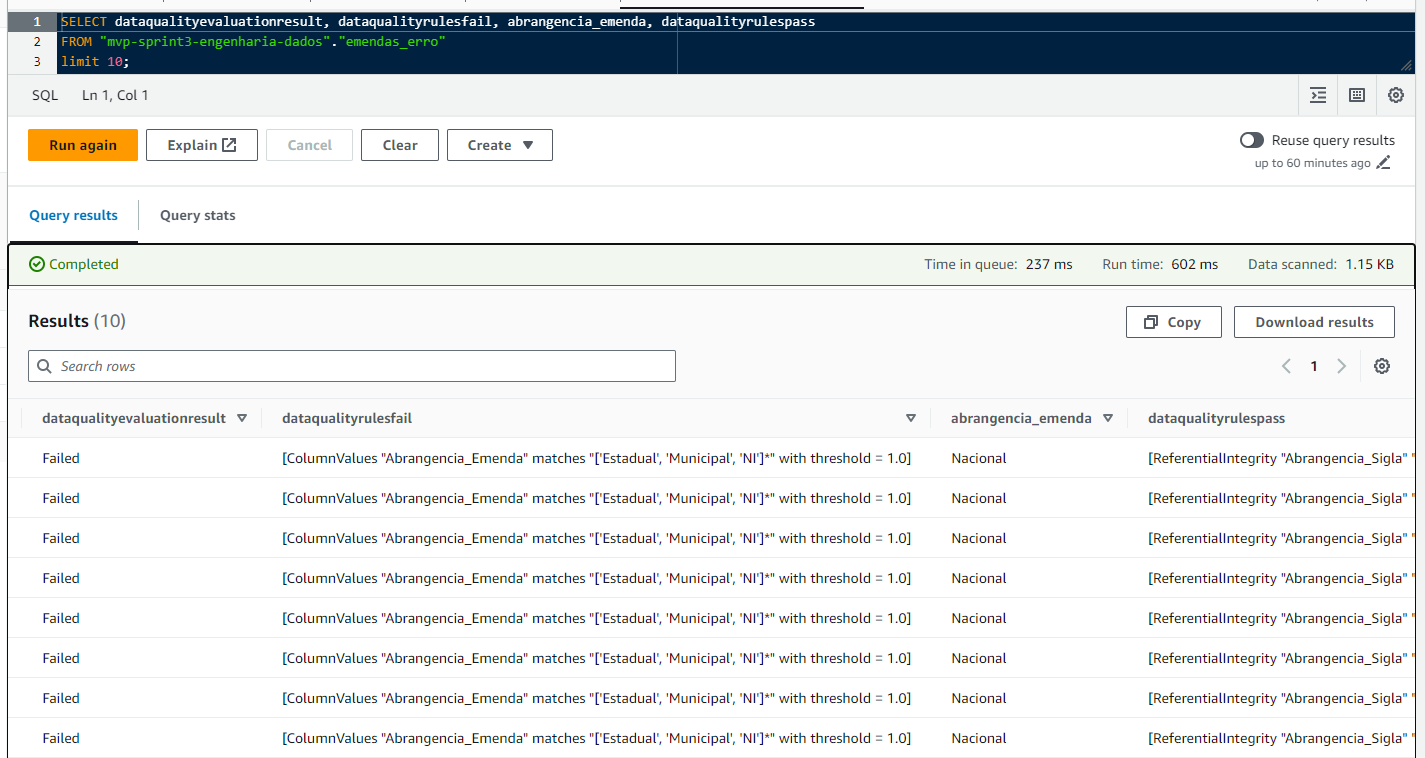

##3.5 Análise

###3.5.1 Ainda sobre qualidade...


A qualidade dos dados desempenha um papel fundamental para a exploração dos dados. Dados precisos, completos e consistentes proporcionam uma base sólida para insights confiáveis. Por outro lado, dados imprecisos podem levar a conclusões distorcidas e erros de interpretação, prejudicando a confiabilidade das análises.

Ao longo desse trabalho já foram realizadas algumas ações com relação a qualidade dos dados. No item 3.2.1 verifiquei que não haviam dados nulos, no item 3.2.2 percebi que os campo de valores estavam definidos como caractere, ponto que foi corrigido no item 3.4.1 durante o módulo de ETL e no final do 3.4.2 comentei sobre 15 ocorrências no campo valor_empenhado que estava com valor zero mas que continha pagamentos feitos

Os campos Abrangencia Emenda e Abrangencia Sigla foram criados por mim no processo realizado no Colab (item 3.2.2)

Os campos Nome Função e Nome Subfunção assim como os campo de valores foram validados contra os arquivos de dominio no processo de qualidade da carga (item 3.4.2)

Os campos Ano Emenda (entre 2015 e 2023) e Tipo emenda (dominio: 'Emenda Individual', 'Emenda de Bancada', 'Emenda de Comissão' e 'Emenda de Relator')foram validados em consultas conforme telas abaixo:




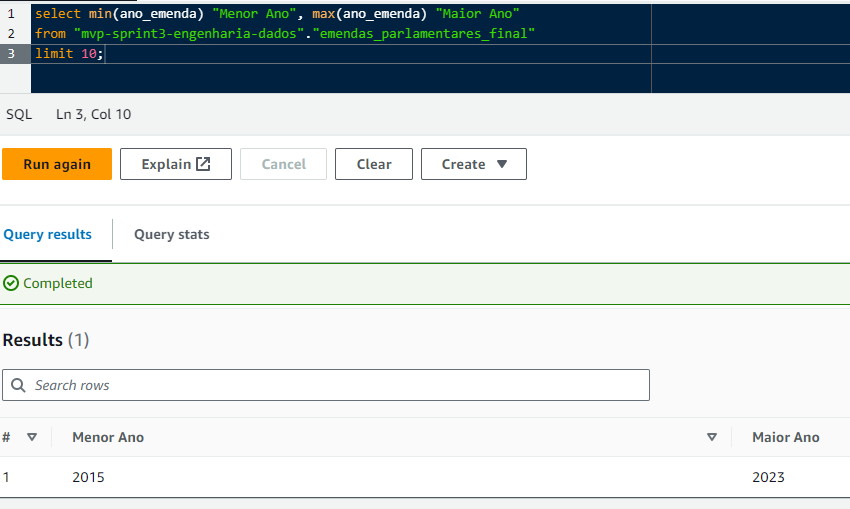

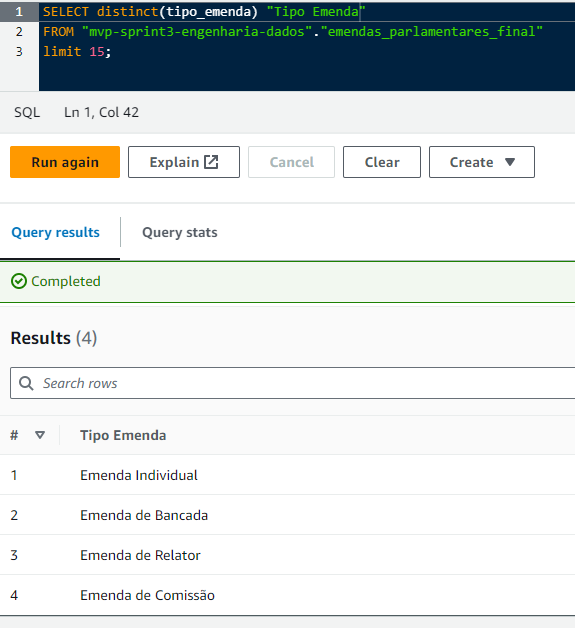

O dicionario disponibilizado pelo Portal da Transparência não está atualizado, tem campos a mais e campos faltantes. Mas a grande dificuldade que tive com relação aos dados foi com o entendimento do conteudo de alguns campos. Por exemplo, o campo Localidade do gasto determina se a emenda é municipal, estadual ou nacional, mas isso baseado no conteudo. Ele pode conter o nome de um município seguido da sigla da UF, pode conter o nome do Estado seguido da string "(UF)" ou pode conter a string "Nacional". Então para saber se a emenda é estadual é necessário pesquisar a string "(UF)" no conteúdo e se for municipal precisa identificar a sigla da UF do conteúdo para saber a qual estado pertence. Por essa razão criei os campos Abrangência Emenda e Abrangência Sigla.

###3.5.2 Solucionando o Problema

Vamos resgatar então o nosso problema inicial e as possíveis questões para soluciona-lo.

Nosso objetivo lá no início foi "Encontrar no Portal da Transparência do governo brasileiro informações sobre as verbas destinadas pelos políticos as suas bases eleitorais" e "Verificar se os parlamentares estão propondo projetos para melhorar a qualidade de vida da população."



E como possíveis perguntas a serem respondidas:

1) Quais políticos conseguiram aprovar mais emendas orçamentárias?

2) Quais políticos aprovaram maiores valores?

3) Para quais setores foram destinadas mais verbas?

4) Quais estados receberam mais verbas?


Se for possível tentarei mapear se políticos de situação conseguem aprovar mais emendas orçamentárias que políticos de oposição.



Quando iniciei o trabalho ainda não tinha ideia de que forma seriam os dados que eu encontraria e sendo assim não defini nenhum parâmetro para as consultas exploratórias. Agora com conhecimento do que encontrei vou definir algumas premissas. Como falei de parlamentares vou utilizar para as respostas apenas as "Emendas Individuais". Outro parâmetro importante é o "Ano da Emenda", fixei o ano de 2022 como base para o trabalho.

Como esse foi meu primeiro contato mais serio com o QuickSight eu montei as visualizações na ferramenta e no Athena eu executei um Sql para confirmar os resultados. Disponibilizei os prints dos resultados no link abaixo.

https://github.com/JGCMachado/Scripts/blob/main/MVP3_SQLs.ipynb


Abaixo o Dashboard criado para responder as perguntas

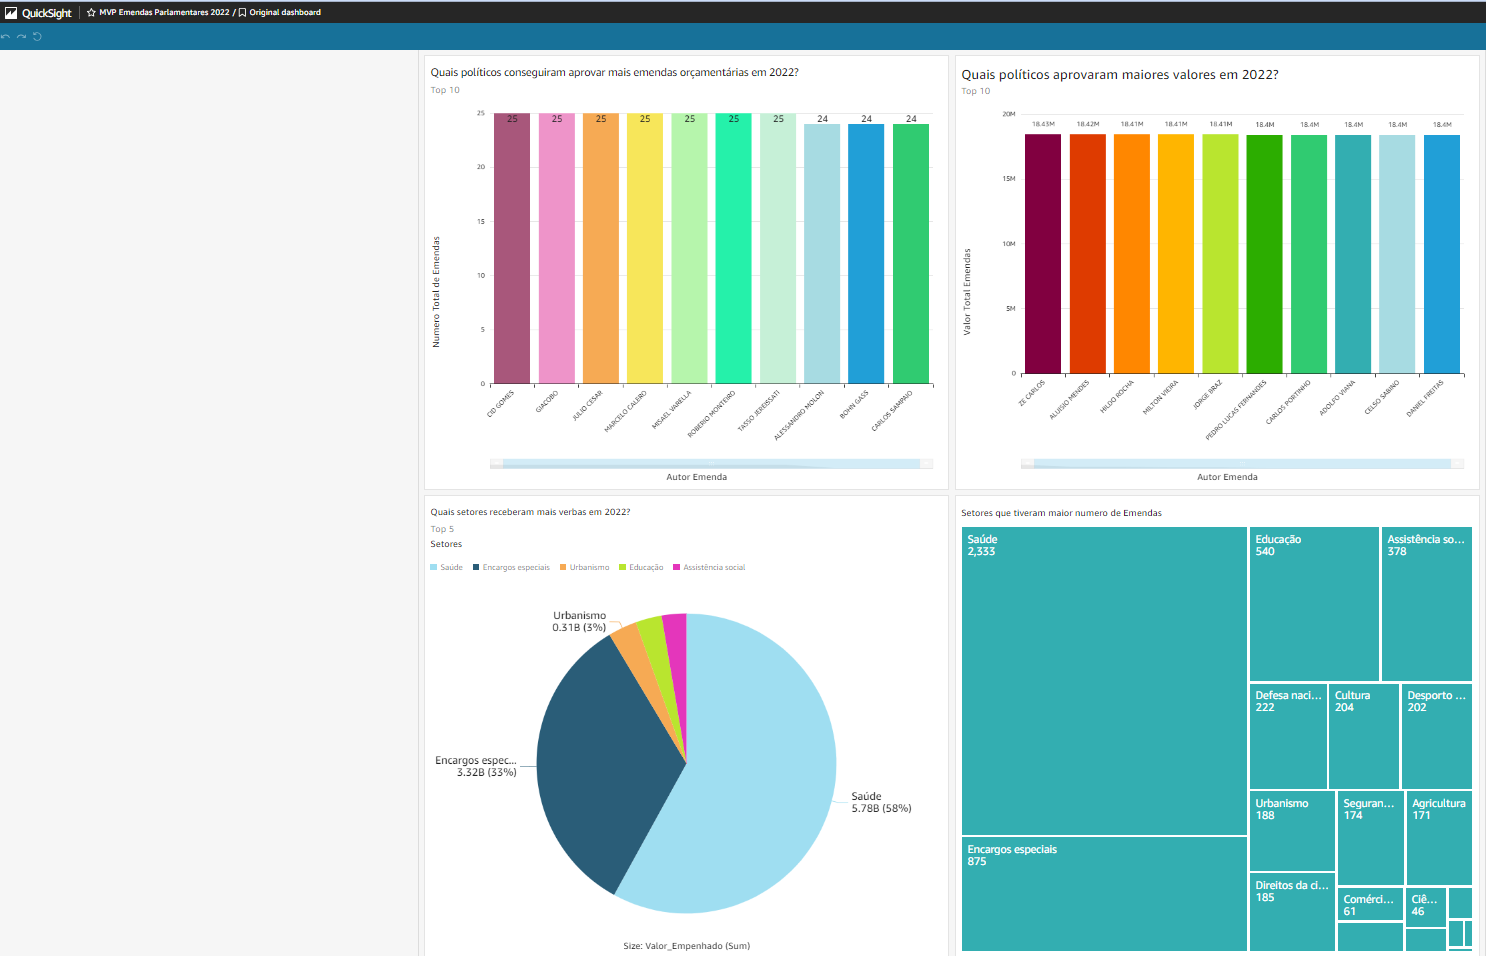

Vamos então passar para as respostas:

1) **Quais políticos conseguiram aprovar mais emendas orçamentárias (no ano de 2022)?**

Cico foram os parlamentares com 25 emendas no ano de 2022
Cid Gomes, Giacobo, Julio Cesar, Marcelo Calero, Misael Varella, Roberto Monteiro e Alessandro Molon


2) **Quais políticos aprovaram maiores valores (no ano de 2022)?**

O parlamentar que aprovou mais verbas foi o Zé Carlos com 18,43 Milhões, seguido de Aluisio Mendes com 18,42M e Hildo Rocha com 16,41M.

A grande descoberta nessas duas perguntas foi que são apresentadas um numero de emendas muito próximo por todos os parlamentares e o mesmo ocorre com os valores totais por ano. Comparei também no gráfico logo abaixo não só os Top 10 mas todos os parlamentares dentro do ano de 2022 e comparei com a média geral dos valores apresentados por parlamentar e o resultado foram 2 linha muito próximas.

Pesquisei no site da câmara dos deputados e descobri que existe um teto para cada parlamentar e que eles utilizam todo o orçamento possível, dessa forma é possível que os parlamentares estejam propondo projetos para melhorar a qualidade de vida da população mas apenas com os dados desse dataset não é possível afirmar isso.

Abaixo trecho retirado do site da Camarâ dos Deputados

"Neste ano, cada parlamentar pôde apresentar 19,7 milhões de reais em emendas individuais impositivas no valor total de 11,7 bilhões de reais."

(Fonte: Agência Câmara de Notícias)"

https://www.camara.leg.br/noticias/919879-parlamentares-apresentam-6-640-emendas-ao-orcamento-de-2023/#:~:text=Neste%20ano%2C%20cada%20parlamentar%20p%C3%B4de,R%24%2011%2C7%20bilh%C3%B5es.

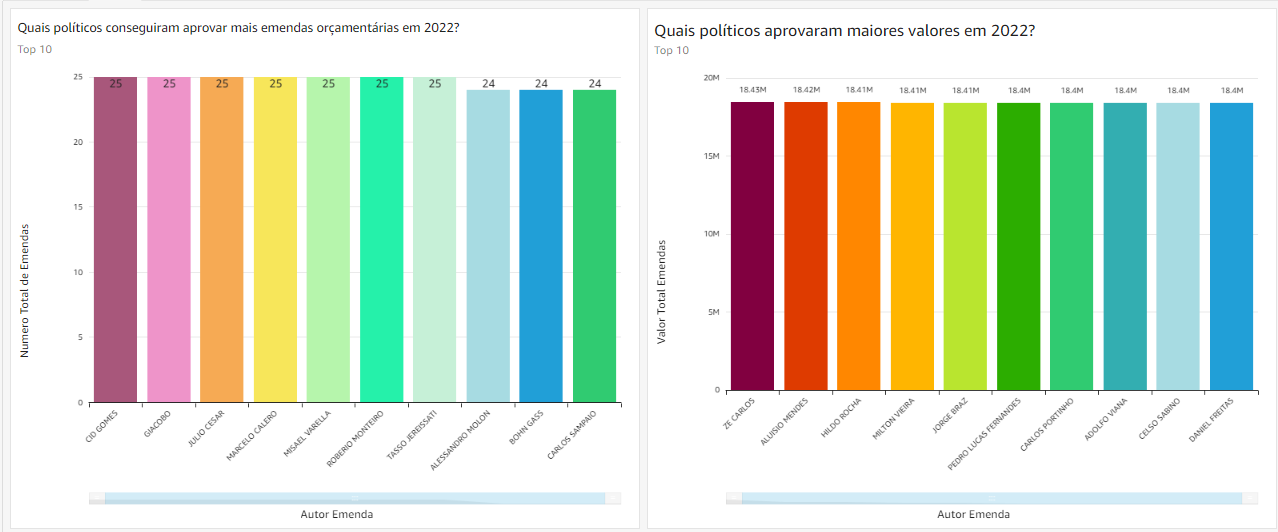

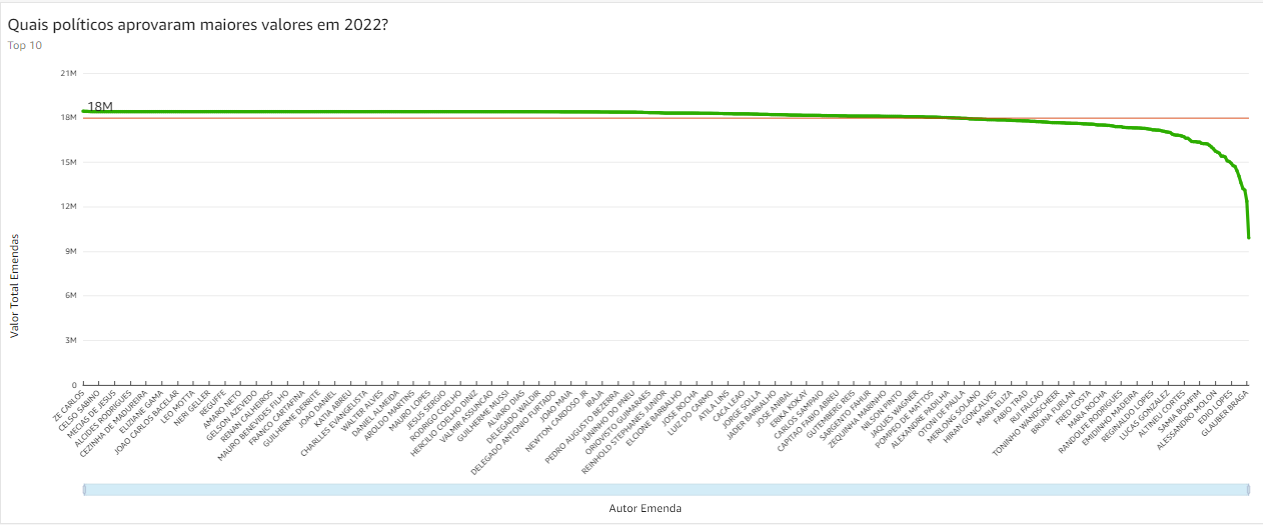

**Curiosidade**

O parlamentar que apresentou o maior numero geral de emendas foi o Alessandro Molon com 184 emendas. Embora ele seja o recordista de emendas, como ele esteve presente em todos os anos do dataset (2015 até 2023), a média de 20 emendas por ano não o faz se destacar a cada ano.

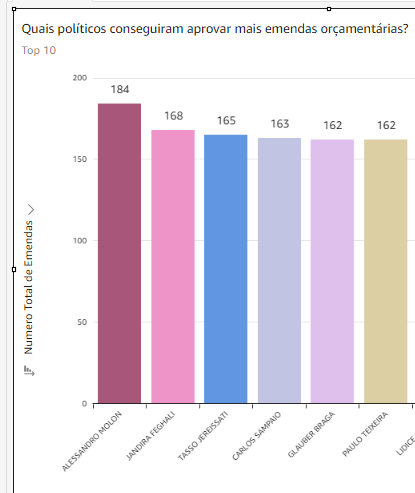

3) **Para quais setores foram destinadas mais verbas?**

O setor que recebeu mais verbas foi o setor da Saúde. em 2022 foram R$ 5,78Bi (58% do orçamento). De acordo com o site da Câmara dos Deputados, "Nas emendas individuais, 50% dos valores devem ser destinados à saúde" (Fonte: Agência Câmara de Notícias), foram 2.333 emendas em 2022.




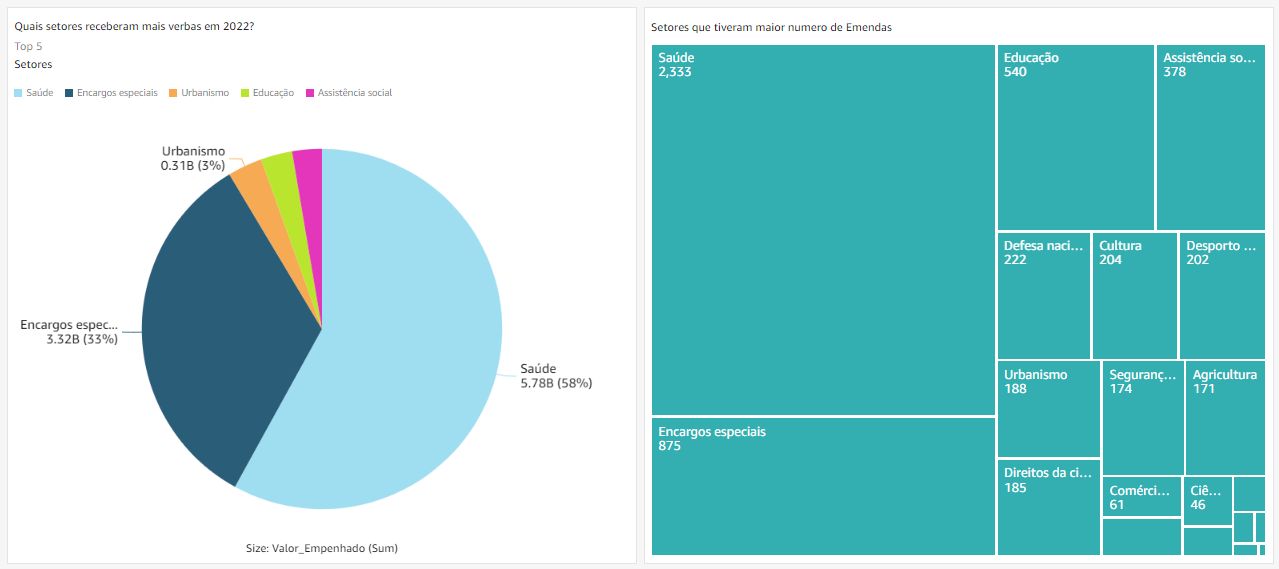

O ponto que destaca nesse gráfico de Verbas por Setores foi o segundo lugar para "Encargos Especiais"com 33% do orçamento em 2022 e que apareceu em 2021 e vem crescendo ano a ano.

De acordo com um documento da Secretaria de Fazenda do Estado de São Paulo, "A função “encargos especiais” engloba as despesas orçamentárias em relação às quais não se pode associar um bem ou serviço, tais como dívida, transferências constitucionais a municípios etc."

"Transferências Constitucionais para Municípios:
O rateio da receita proveniente da arrecadação de impostos entre os entes federados representa um mecanismo fundamental para amenizar as desigualdades regionais, na busca incessante de promover o equilíbrio sócio-econômico entre Estados."

Como no dataset as subfunções que aparecem (845/846) não são referentes a dívida, existe a possibilidade de ser um repasse para os municípios dando autonomia para que eles façam a destinação da verba. Mas para garantir precisaria aprofundar o estudo nesse sentido.

As Subfunções associadas são:
841 - Refinanciamento da Dívida Interna
842 - Refinanciamento da Dívida Externa
843 - Serviço da Dívida Interna
844 - Serviço da Dívida Externa
845 - Outras Transferências
846 - Outros Encargos Especiais
847 - Transferências para a Educação Básica



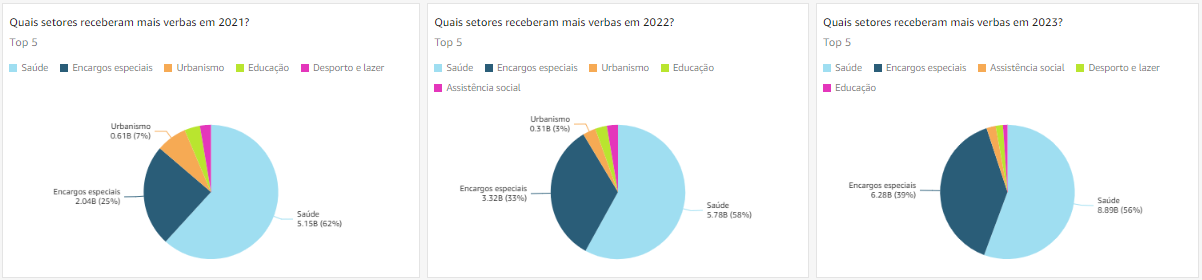

Voltando no ponto da Saúde, outro ponto que podemos observar foi o aumento do orçamento neste setor nos anos pós pandemia.

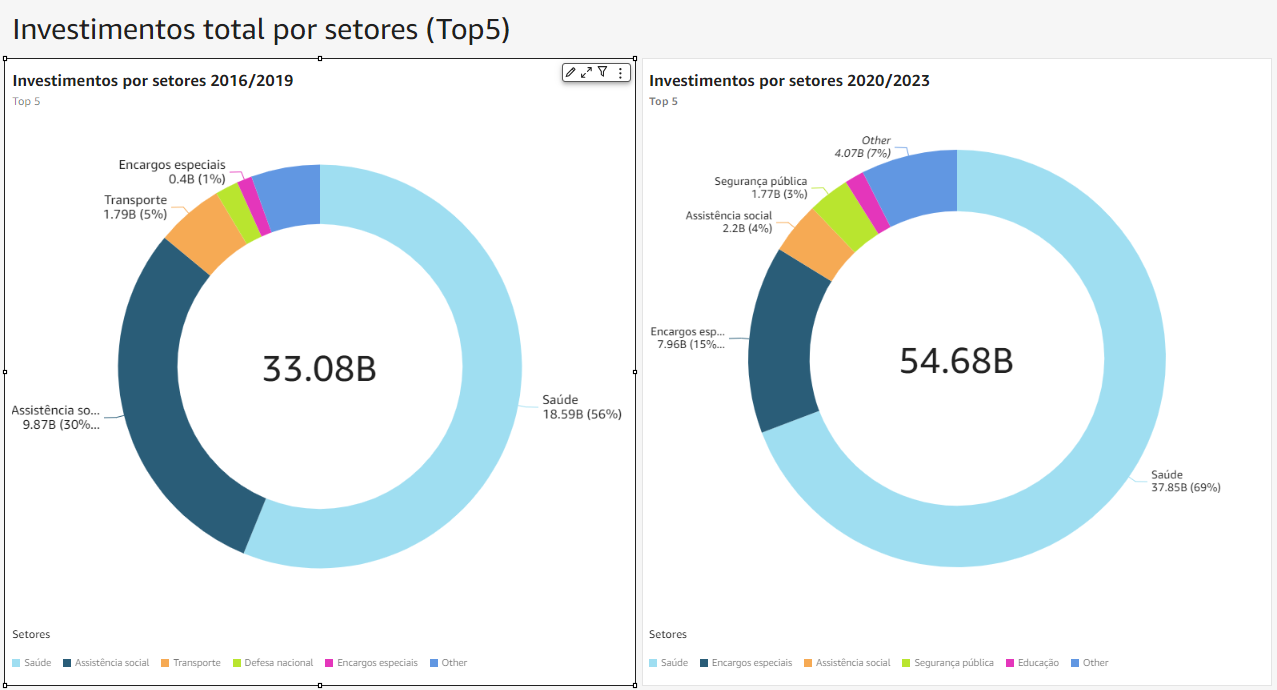

4) **Quais estados receberam mais verbas?**

Para responder essa pergunta somei tanto as emendas estaduais como também as municipais. E o Estado que recebeu a maior parcela da verba foi o estado de São Paulo



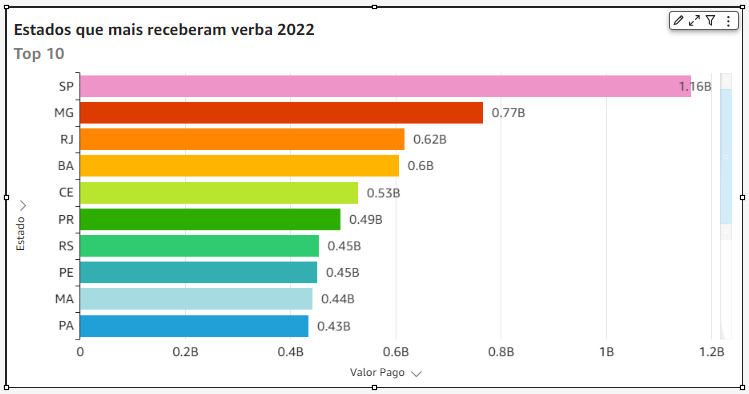

Chegando aqui ao final da quarta e ultima questão e revisitando todas as respostas vemos o quanto a Ciência de Dados é provocante e o quanto a curiosidade nos leva sempre a novas analises que extrapolam a nossa percepção inicial. Além desses insigths registrados aqui muito mais coisas foram vistas e pensadas.

Entendo que as respostas puderam ser respondidas e ao final podemos dizer que as emendas estão sendo aprovadas e o orçamento disponível está sendo utilizado e isso é muito bom. Com isso finalizamos a primeira parte do problema.

A segunda parte que questiona se o orçamento está sendo realmente empregado em projetos que melhorem a qualidade de vida da população, essa precisa